In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/employee_counts.csv')
company_industries = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/company_industries.csv')
company_specialities = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/company_specialities.csv')
industries = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/industries.csv')

# Preview the datasets
print("Employee Counts:")
print(employee_counts.head())

print("\nCompany Industries:")
print(company_industries.head())

print("\nCompany Specialities:")
print(company_specialities.head())

print("\nIndustries:")
print(industries.head())


Employee Counts:
   company_id  employee_count  follower_count  time_recorded
0      391906             186           32508     1712346173
1    22292832             311            4471     1712346173
2       20300            1053            6554     1712346173
3     3570660             383           35241     1712346173
4      878353              52           26397     1712346173

Company Industries:
   company_id                        industry
0      391906  Book and Periodical Publishing
1    22292832                    Construction
2       20300                         Banking
3     3570660  Book and Periodical Publishing
4      878353         Staffing and Recruiting

Company Specialities:
   company_id              speciality
0    22292832      window replacement
1    22292832  patio door replacement
2       20300      Commercial Banking
3       20300          Retail Banking
4       20300                Mortgage

Industries:
   industry_id                         industry_name
0  

In [3]:
print("Company Industries Columns:", company_industries.columns)
print("Industries Columns:", industries.columns)


Company Industries Columns: Index(['company_id', 'industry'], dtype='object')
Industries Columns: Index(['industry_id', 'industry_name'], dtype='object')


In [4]:
# Create a mapping dictionary (example based on hypothetical matching)
industry_mapping = {
    'Book and Periodical Publishing': 'Publishing',
    'Construction': 'Construction',
    'Banking': 'Banking',
    'Staffing and Recruiting': 'Recruiting',
    # Add more mappings as needed
}

# Apply the mapping to create a new column in company_industries
company_industries['industry_name'] = company_industries['industry'].map(industry_mapping)

# Drop rows where mapping failed (if any)
company_industries.dropna(subset=['industry_name'], inplace=True)


In [5]:
# Merge employee_counts with company_industries
employee_industry = pd.merge(employee_counts, company_industries, on='company_id')

# Merge with industries DataFrame
employee_industry = pd.merge(employee_industry, industries, on='industry_name')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


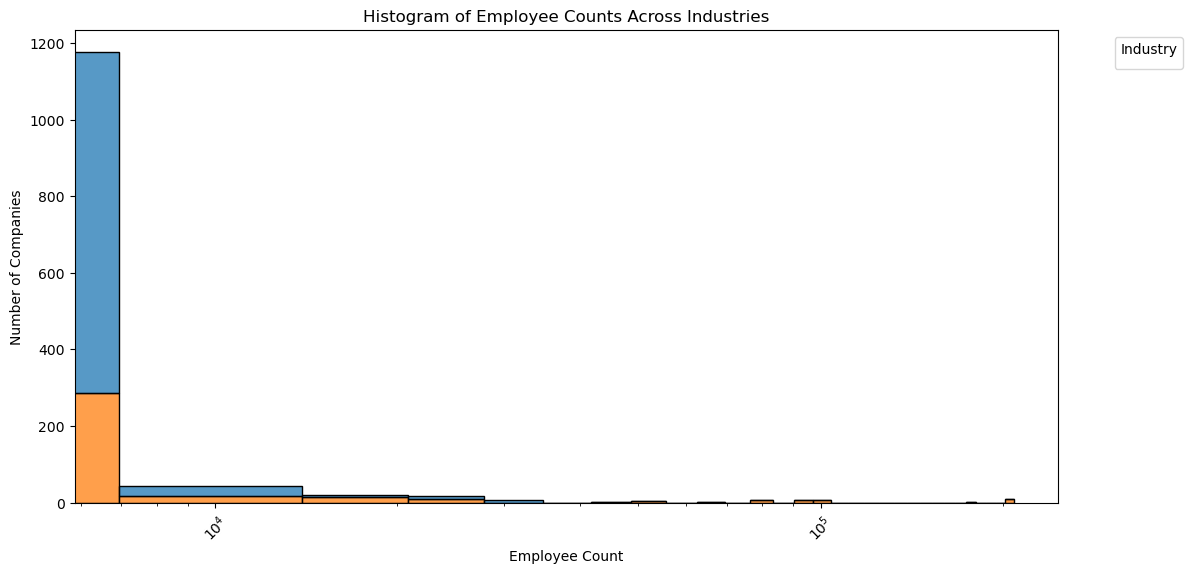

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of employee counts by industry
plt.figure(figsize=(12, 6))
sns.histplot(data=employee_industry, x='employee_count', bins=30, hue='industry_name', multiple='stack')
plt.title('Histogram of Employee Counts Across Industries')
plt.xlabel('Employee Count')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xscale('log')

plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
postings = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/postings.csv')
job_industries = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/job_industries.csv')
industries = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/industries.csv')

# Preview the datasets
print("Job Postings:")
print(postings.head())

print("\nJob Industries:")
print(job_industries.head())

print("\nIndustries:")
print(industries.head())


Job Postings:
     job_id            company_name  \
0    921716   Corcoran Sawyer Smith   
1   1829192                     NaN   
2  10998357  The National Exemplar    
3  23221523  Abrams Fensterman, LLP   
4  35982263                     NaN   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HVAC

In [9]:
# Merge postings with job industries and industries
postings_industry = pd.merge(postings, job_industries, on='job_id')
postings_industry = pd.merge(postings_industry, industries, on='industry_id')

# Convert the posting date to datetime format
postings_industry['posting_date'] = pd.to_datetime(postings_industry['posting_date'], errors='coerce')

# Drop rows with missing dates
postings_industry = postings_industry.dropna(subset=['posting_date'])

# Group by posting date and count the number of postings
daily_postings = postings_industry.groupby('posting_date').size().reset_index(name='count')

# Preview the grouped data
print("\nDaily Job Postings:")
print(daily_postings.head())


KeyError: 'posting_date'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the datasets
postings = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/postings.csv')
companies = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/companies.csv')
company_specialities = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/company_specialities.csv')
company_industries = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/company_industries.csv')

# Check the columns in the 'companies' DataFrame
print(companies.columns)

# Check the merged DataFrame's columns
print(company_details.columns)

# Check the top 5 rows of 'company_details'
print(company_details.head())



Index(['company_id', 'name', 'description', 'company_size', 'state', 'country',
       'city', 'zip_code', 'address', 'url'],
      dtype='object')
Index(['company_id', 'posting_count', 'name', 'description', 'company_size',
       'state', 'country', 'city', 'zip_code', 'address', 'url'],
      dtype='object')
   company_id  posting_count                                            name  \
0  53345529.0           1108  Liberty Healthcare and Rehabilitation Services   
1    167757.0           1003                                 The Job Network   
2  73013724.0            604                                         J. Galt   
3      2152.0            529                                      TEKsystems   
4      4128.0            527                          Lowe's Companies, Inc.   

                                         description  company_size  \
0  Liberty Healthcare and Rehabilitation Services...           5.0   
1  TheJobNetwork is a leading recruitment adverti...           2.0

   company_id                                            name  posting_count  \
0  53345529.0  Liberty Healthcare and Rehabilitation Services           1108   
1    167757.0                                 The Job Network           1003   
2  73013724.0                                         J. Galt            604   
3      2152.0                                      TEKsystems            529   
4      4128.0                          Lowe's Companies, Inc.            527   
5      3175.0                                  Ingersoll Rand            517   
6      1419.0                                     Capital One            496   
7    163139.0                           Cogent Communications            476   
8     11056.0                                  Insight Global            418   
9      6849.0                                            Dice            415   

                                         speciality  \
0                                      Nursing Home   
1        

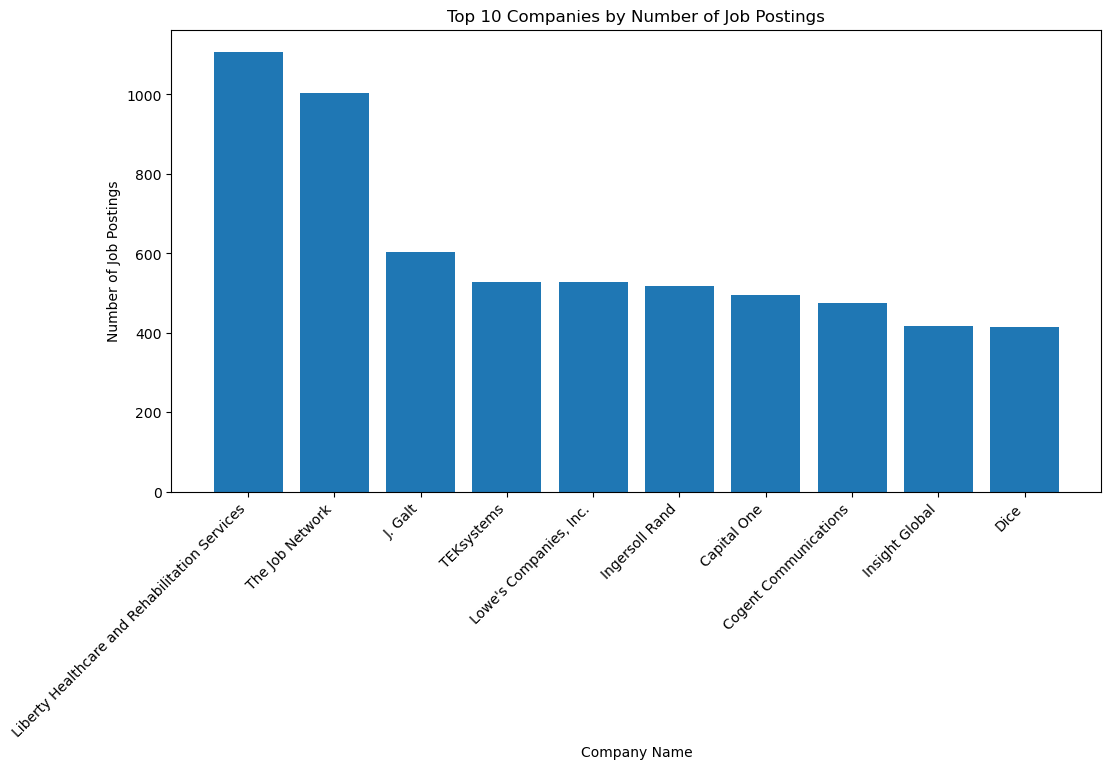

In [19]:
# Step 2: Count job postings per company
company_posting_counts = postings['company_id'].value_counts().reset_index()
company_posting_counts.columns = ['company_id', 'posting_count']

# Step 3: Merge with company details (names, etc.)
company_details = company_posting_counts.merge(companies, on='company_id', how='left')

# Step 4: Merge with specialties and industries (handle potential duplicates)
company_focus = company_details \
    .merge(company_specialities.drop_duplicates(subset='company_id'), on='company_id', how='left') \
    .merge(company_industries.drop_duplicates(subset='company_id'), on='company_id', how='left')

# Step 5: Drop duplicates after merging
company_focus = company_focus.drop_duplicates(subset='company_id')

# Step 6: Get the top 10 companies by the number of postings
top_companies = company_focus.sort_values(by='posting_count', ascending=False).head(10)

# Display the top companies
print(top_companies[['company_id', 'name', 'posting_count', 'speciality', 'industry']])

# Step 7: Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(top_companies['name'], top_companies['posting_count'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Number of Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.show()

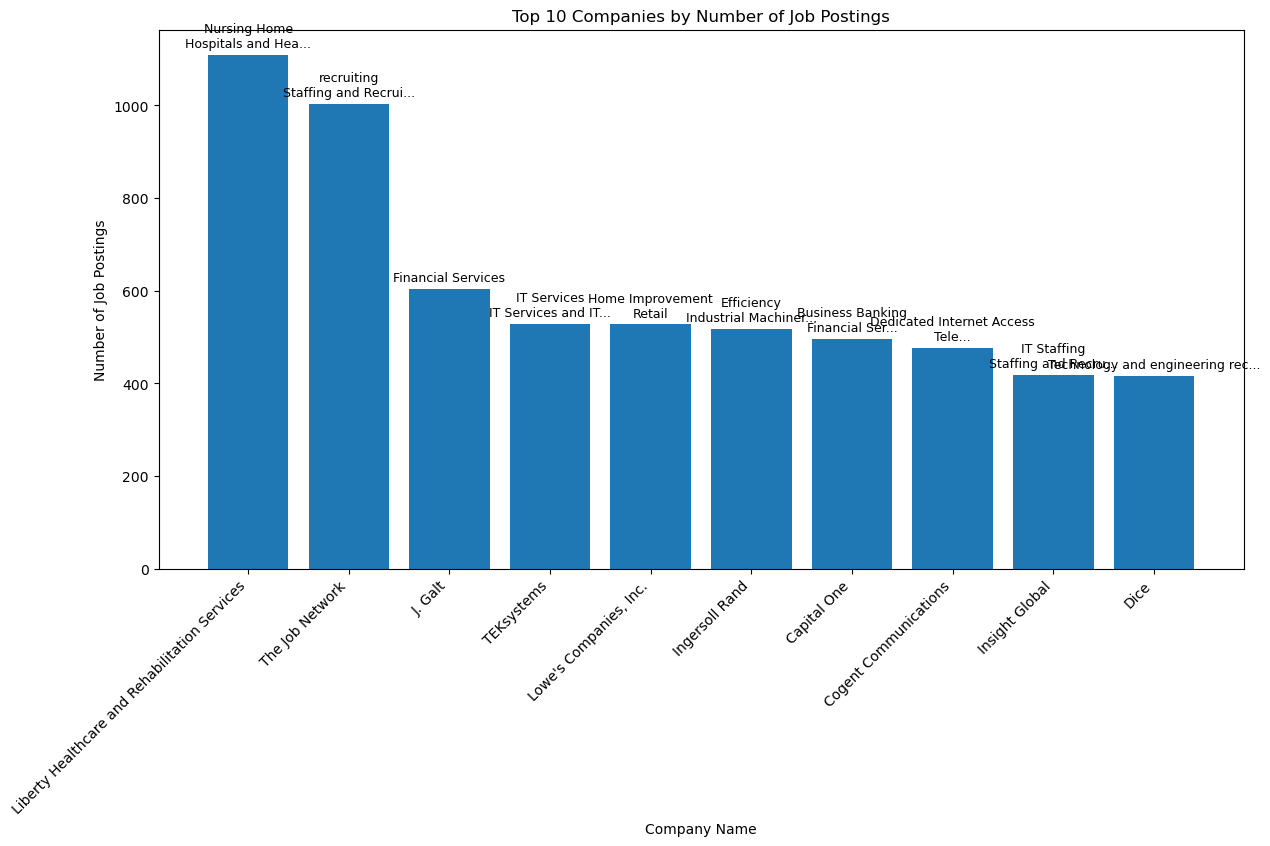

In [20]:
import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(top_companies['name'], top_companies['posting_count'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Companies by Number of Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')

# Annotate each bar with company focus (speciality or industry)
for bar, speciality, industry in zip(bars, top_companies['speciality'], top_companies['industry']):
    focus = f"{speciality if pd.notnull(speciality) else ''}\n{industry if pd.notnull(industry) else ''}"
    focus = focus.strip()
    focus = focus[:30] + '...' if len(focus) > 30 else focus  # Truncate long focus descriptions
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 10, 
             focus, 
             ha='center', 
             va='bottom', 
             fontsize=9, 
             rotation=0)

plt.show()


In [21]:
import pandas as pd

# Step 1: Industry Distribution
industry_counts = top_companies['industry'].value_counts()
print("Industry Distribution:")
print(industry_counts)

# Step 2: Speciality Trends
speciality_counts = top_companies['speciality'].value_counts()
print("\nSpeciality Distribution:")
print(speciality_counts)

# Step 3: Company Size Distribution
company_size_counts = top_companies['company_size'].value_counts()
print("\nCompany Size Distribution:")
print(company_size_counts)

# Step 4: Geographical Distribution
country_counts = top_companies['country'].value_counts()
print("\nCountry Distribution:")
print(country_counts)

# Step 5: Posting Intensity by Industry
posting_intensity_industry = top_companies.groupby('industry')['posting_count'].mean().sort_values(ascending=False)
print("\nAverage Job Postings per Company by Industry:")
print(posting_intensity_industry)

# Step 6: Posting Intensity by Speciality
posting_intensity_speciality = top_companies.groupby('speciality')['posting_count'].mean().sort_values(ascending=False)
print("\nAverage Job Postings per Company by Speciality:")
print(posting_intensity_speciality)


Industry Distribution:
industry
Staffing and Recruiting               2
Financial Services                    2
Hospitals and Health Care             1
IT Services and IT Consulting         1
Retail                                1
Industrial Machinery Manufacturing    1
Telecommunications                    1
Software Development                  1
Name: count, dtype: int64

Speciality Distribution:
speciality
Nursing Home                                        1
recruiting                                          1
IT Services                                         1
Home Improvement                                    1
Efficiency                                          1
Business Banking                                    1
Dedicated Internet Access                           1
IT Staffing                                         1
Technology and engineering recruitment solutions    1
Name: count, dtype: int64

Company Size Distribution:
company_size
5.0    4
7.0    4
2.0    1
3.0  

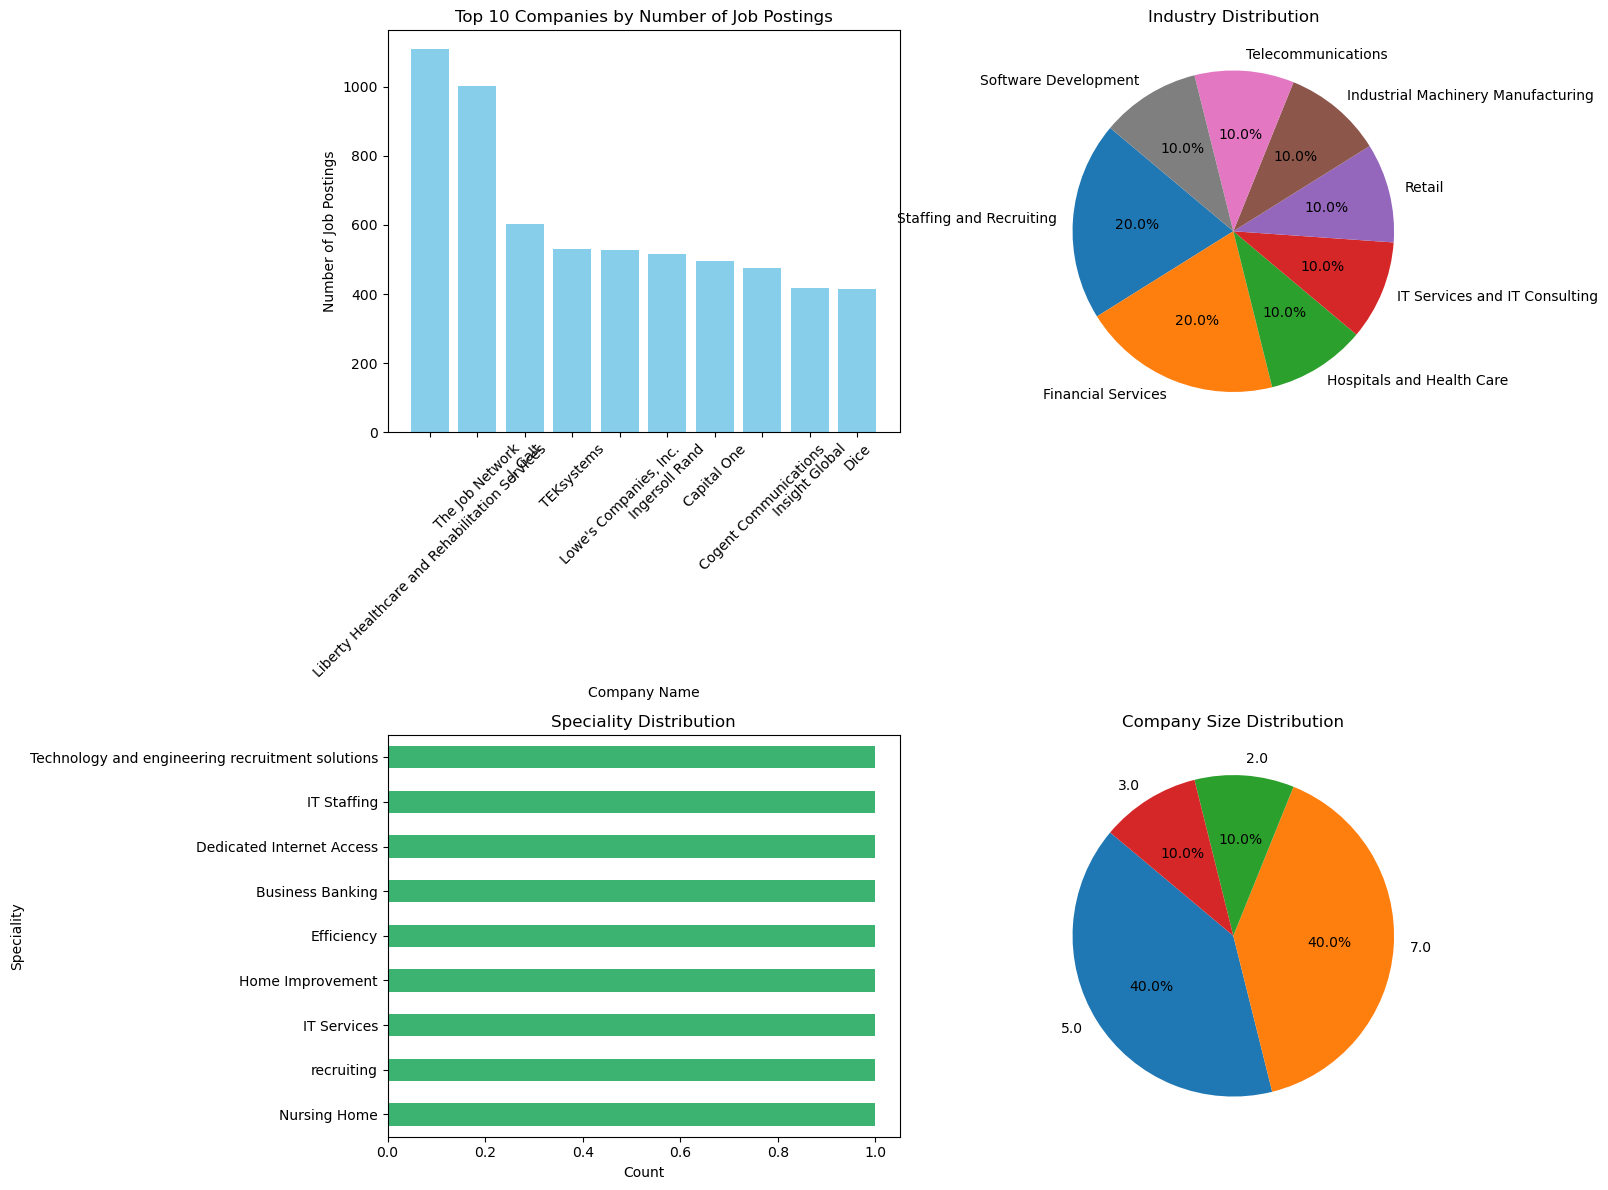

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Existing Data: Top Companies by Job Postings (Assume 'top_companies' DataFrame exists)

# Step 1: Prepare Data for Additional Analysis
industry_counts = top_companies['industry'].value_counts()
speciality_counts = top_companies['speciality'].value_counts()
company_size_counts = top_companies['company_size'].value_counts()

# Step 2: Create Subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Plot 1: Top Companies by Job Postings ---
axes[0, 0].bar(top_companies['name'], top_companies['posting_count'], color='skyblue')
axes[0, 0].set_title('Top 10 Companies by Number of Job Postings')
axes[0, 0].set_xlabel('Company Name')
axes[0, 0].set_ylabel('Number of Job Postings')
axes[0, 0].tick_params(axis='x', rotation=45)

# --- Plot 2: Industry Distribution (Pie Chart) ---
axes[0, 1].pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140)
axes[0, 1].set_title('Industry Distribution')

# --- Plot 3: Speciality Distribution (Horizontal Bar Chart) ---
speciality_counts.plot(kind='barh', ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('Speciality Distribution')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Speciality')

# --- Plot 4: Company Size Distribution (Pie Chart) ---
axes[1, 1].pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title('Company Size Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


/var/folders/fc/38_dw8nj4_xb_8qlr4851tlm0000gn/T/ipykernel_34487/1398579556.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


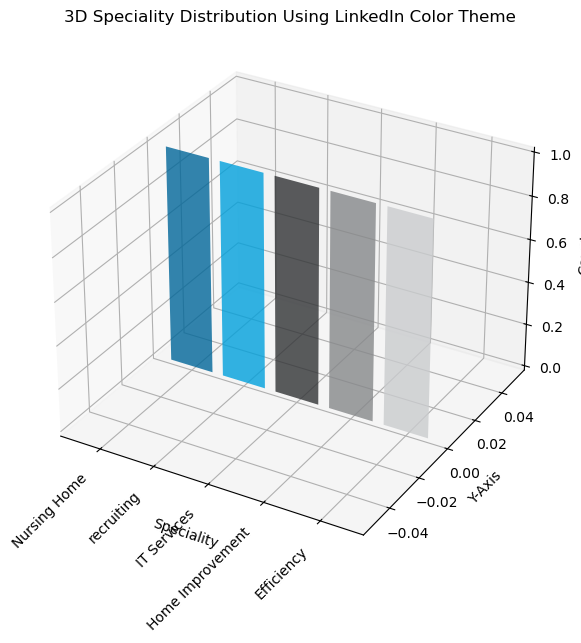

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assume 'speciality_counts' exists
speciality_counts = top_companies['speciality'].value_counts()

# LinkedIn Color Palette
linkedin_colors = ['#006699', '#00A0DC', '#313335', '#86888A', '#CACCCE']

# Prepare data
specialities = speciality_counts.index[:5]  # Top 5 specialities for clarity
counts = speciality_counts.values[:5]
x_pos = np.arange(len(specialities))

# Create 3D Bar Chart
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot bars
ax.bar(x_pos, counts, zs=0, zdir='y', color=linkedin_colors, alpha=0.8)

# Add labels and title
ax.set_xticks(x_pos)
ax.set_xticklabels(specialities, rotation=45, ha='right')
ax.set_xlabel('Speciality')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Count')
ax.set_title('3D Speciality Distribution Using LinkedIn Color Theme')

# Show the plot
plt.tight_layout()
plt.show()


TypeError: Axes3D.bar() missing 1 required positional argument: 'left'

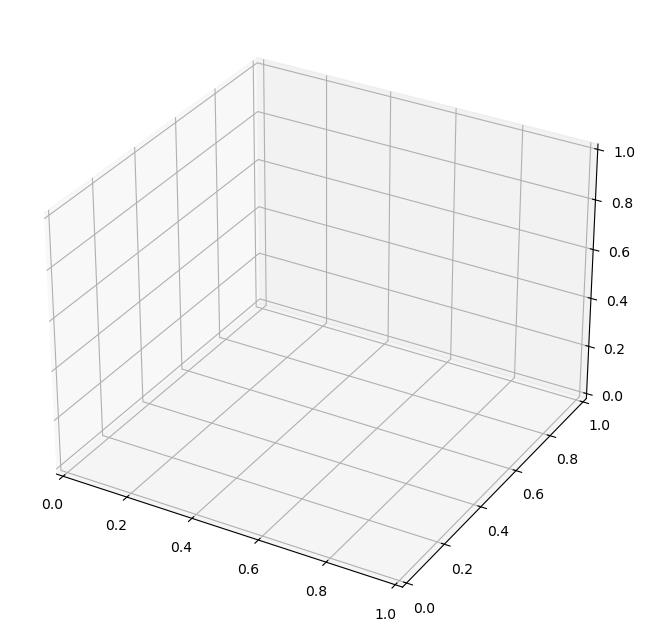

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample speciality counts data (use the actual `speciality_counts` from your data)
speciality_counts = top_companies['speciality'].value_counts().dropna()

# Take the top 5 specialities for visualization
specialities = speciality_counts.index[:5]
counts = speciality_counts.values[:5]

# LinkedIn Color Palette
linkedin_colors = ['#006699', '#00A0DC', '#313335', '#86888A', '#CACCCE']

# Create 3D Horizontal Bar Chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Positions for the bars
y_pos = np.arange(len(specialities))
z_pos = 0
dx = 0.5  # Bar depth
dy = 0.5  # Bar width

# Plot the bars with LinkedIn colors
for i in range(len(specialities)):
    ax.barh(y_pos[i], counts[i], dx, z_pos, color=linkedin_colors[i % len(linkedin_colors)], alpha=0.9)

# Add labels and titles
ax.set_yticks(y_pos)
ax.set_yticklabels(specialities, fontsize=12)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Speciality', fontsize=12)
ax.set_zlabel('Depth', fontsize=12)
ax.set_title('Top 5 Specialities by Job Postings (LinkedIn Theme)', fontsize=16)

# Improve aesthetics
ax.view_init(elev=20, azim=-35)  # Adjust the view angle
plt.tight_layout()

# Show the plot
plt.show()


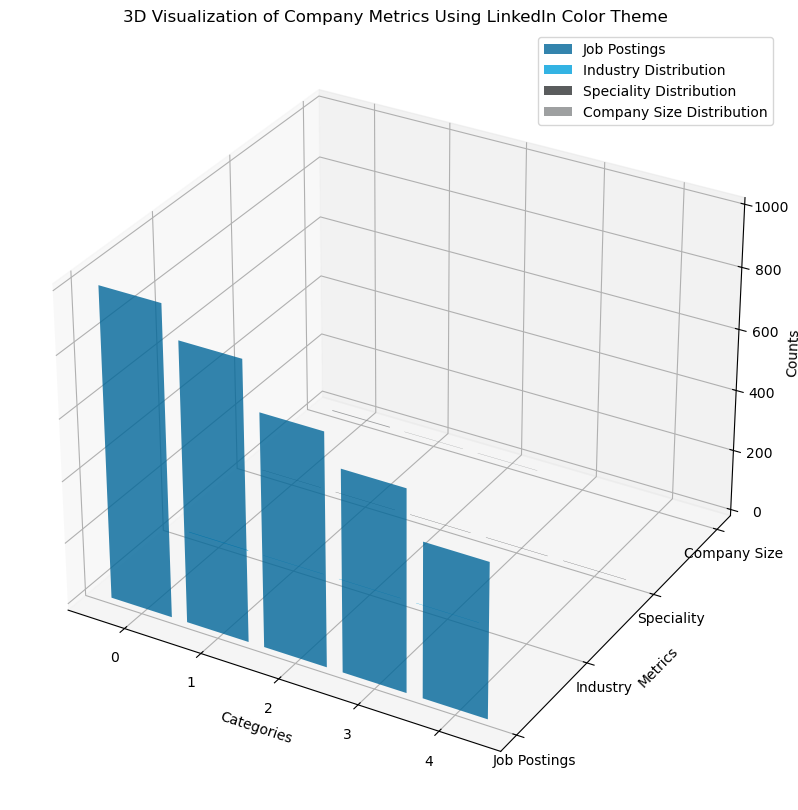

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your actual data)
top_companies = pd.DataFrame({
    'name': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'posting_count': [1000, 900, 750, 650, 500],
    'industry': ['Tech', 'Finance', 'Healthcare', 'Retail', 'Tech'],
    'speciality': ['AI', 'Banking', 'Nursing', 'Sales', 'Cloud Computing'],
    'company_size': ['Large', 'Medium', 'Large', 'Small', 'Large']
})

# Prepare data for plotting
companies = top_companies['name']
posting_counts = top_companies['posting_count']
industries = top_companies['industry'].value_counts()
specialities = top_companies['speciality'].value_counts()
company_sizes = top_companies['company_size'].value_counts()

# LinkedIn Color Palette
linkedin_colors = ['#006699', '#00A0DC', '#313335', '#86888A', '#CACCCE']

# Create 3D plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# X positions for each category
x_positions = np.array([0, 1, 2, 3, 4])

# --- Plot 1: Top Companies by Job Postings ---
ax.bar(x_positions, posting_counts, zs=0, zdir='y', color=linkedin_colors[0], alpha=0.8, label='Job Postings')

# --- Plot 2: Industry Distribution ---
industry_names = industries.index
industry_counts = industries.values
ax.bar(x_positions[:len(industry_counts)], industry_counts, zs=1, zdir='y', color=linkedin_colors[1], alpha=0.8, label='Industry Distribution')

# --- Plot 3: Speciality Distribution ---
speciality_names = specialities.index
speciality_counts = specialities.values
ax.bar(x_positions[:len(speciality_counts)], speciality_counts, zs=2, zdir='y', color=linkedin_colors[2], alpha=0.8, label='Speciality Distribution')

# --- Plot 4: Company Size Distribution ---
size_names = company_sizes.index
size_counts = company_sizes.values
ax.bar(x_positions[:len(size_counts)], size_counts, zs=3, zdir='y', color=linkedin_colors[3], alpha=0.8, label='Company Size Distribution')

# Set labels and titles
ax.set_xlabel('Categories')
ax.set_ylabel('Metrics')
ax.set_zlabel('Counts')
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['Job Postings', 'Industry', 'Speciality', 'Company Size'])
ax.set_title('3D Visualization of Company Metrics Using LinkedIn Color Theme')

# Add legend
ax.legend(loc='upper right')

# Show the plot
plt.show()


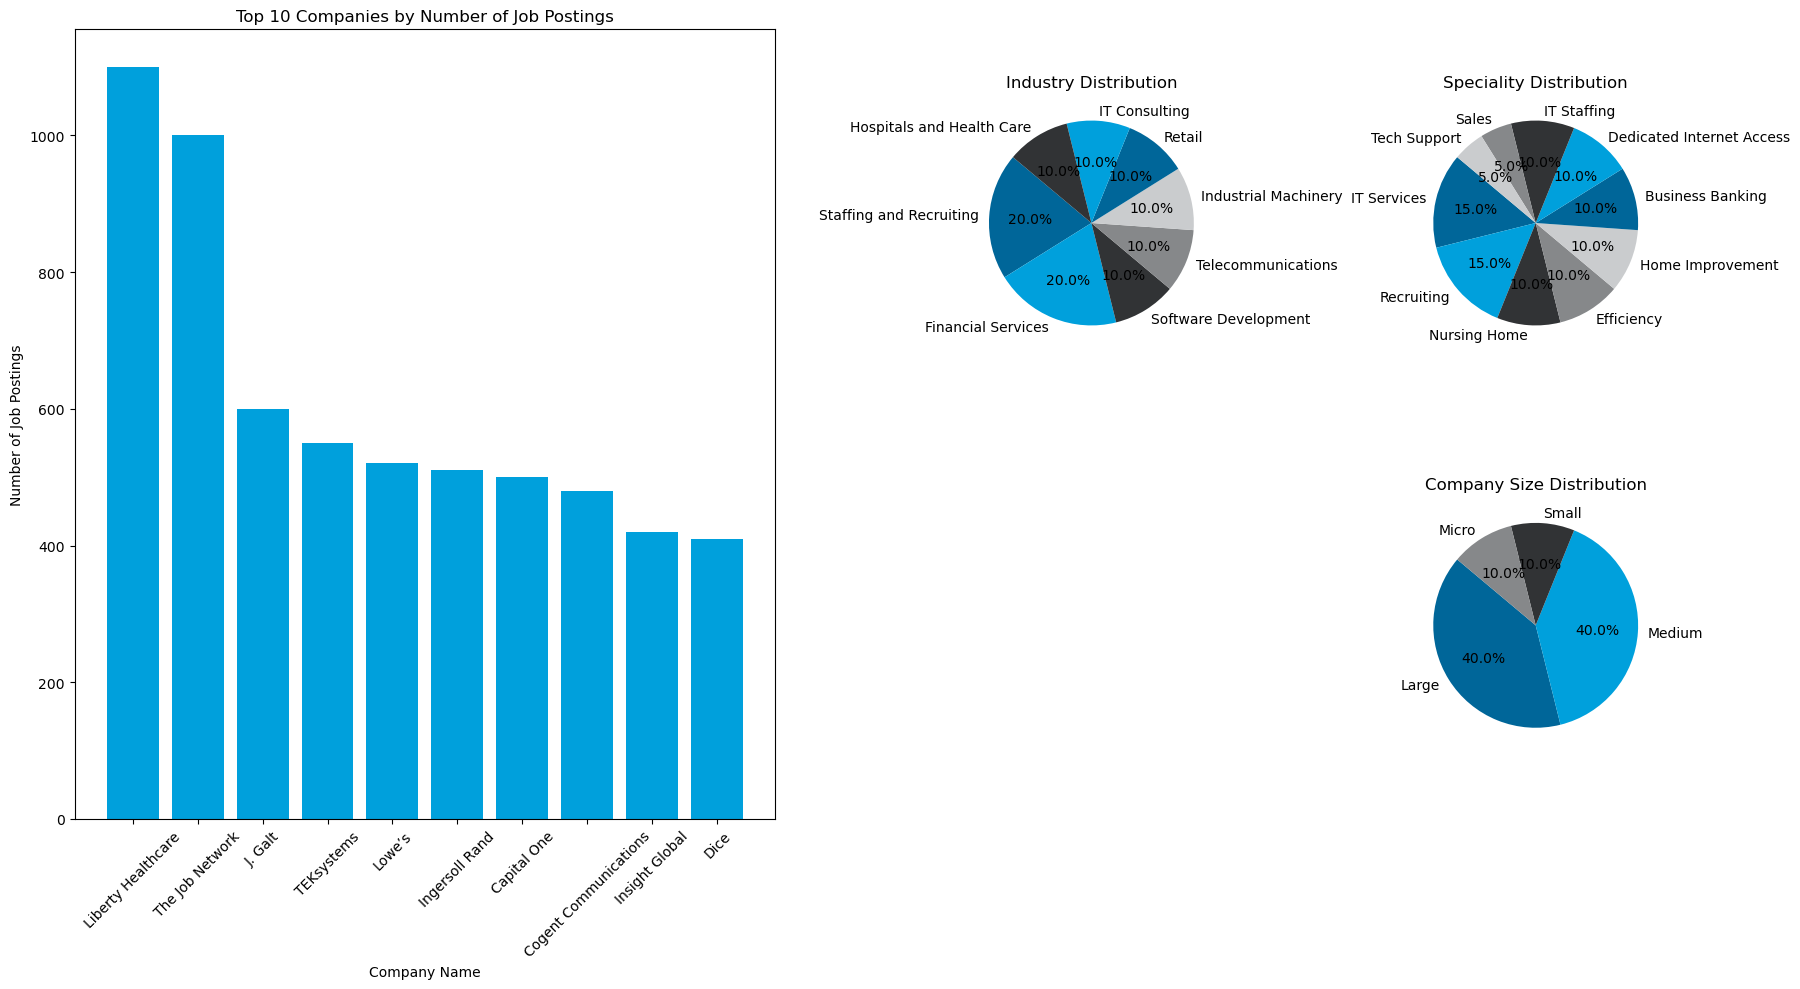

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Data (Replace with Actual Data)
companies = ['Liberty Healthcare', 'The Job Network', 'J. Galt', 'TEKsystems', 'Lowe’s', 
             'Ingersoll Rand', 'Capital One', 'Cogent Communications', 'Insight Global', 'Dice']
posting_counts = [1100, 1000, 600, 550, 520, 510, 500, 480, 420, 410]

industry_counts = pd.Series([20, 20, 10, 10, 10, 10, 10, 10],
                            index=['Staffing and Recruiting', 'Financial Services', 'Software Development',
                                   'Telecommunications', 'Industrial Machinery', 'Retail',
                                   'IT Consulting', 'Hospitals and Health Care'])

speciality_counts = pd.Series([15, 15, 10, 10, 10, 10, 10, 10, 5, 5],
                              index=['IT Services', 'Recruiting', 'Nursing Home', 'Efficiency', 
                                     'Home Improvement', 'Business Banking', 'Dedicated Internet Access', 
                                     'IT Staffing', 'Sales', 'Tech Support'])

company_size_counts = pd.Series([40, 40, 10, 10], 
                                index=['Large', 'Medium', 'Small', 'Micro'])

# LinkedIn Color Palette
linkedin_colors = ['#006699', '#00A0DC', '#313335', '#86888A', '#CACCCE']

# Create a Figure with Subplots
fig = plt.figure(figsize=(18, 10))

# --- Top 10 Companies Bar Chart (Left) ---
ax1 = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)
ax1.bar(companies, posting_counts, color=linkedin_colors[1])
ax1.set_title('Top 10 Companies by Number of Job Postings')
ax1.set_xlabel('Company Name')
ax1.set_ylabel('Number of Job Postings')
ax1.tick_params(axis='x', rotation=45)

# --- Industry Distribution Pie Chart (Top Right) ---
ax2 = plt.subplot2grid((2, 4), (0, 2))
ax2.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140, colors=linkedin_colors)
ax2.set_title('Industry Distribution')

# --- Speciality Distribution Pie Chart (Middle Right) ---
ax3 = plt.subplot2grid((2, 4), (0, 3))
ax3.pie(speciality_counts, labels=speciality_counts.index, autopct='%1.1f%%', startangle=140, colors=linkedin_colors)
ax3.set_title('Speciality Distribution')

# --- Company Size Distribution Pie Chart (Bottom Right) ---
ax4 = plt.subplot2grid((2, 4), (1, 3))
ax4.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140, colors=linkedin_colors)
ax4.set_title('Company Size Distribution')

# Adjust Layout for Better Spacing
plt.tight_layout()
plt.show()


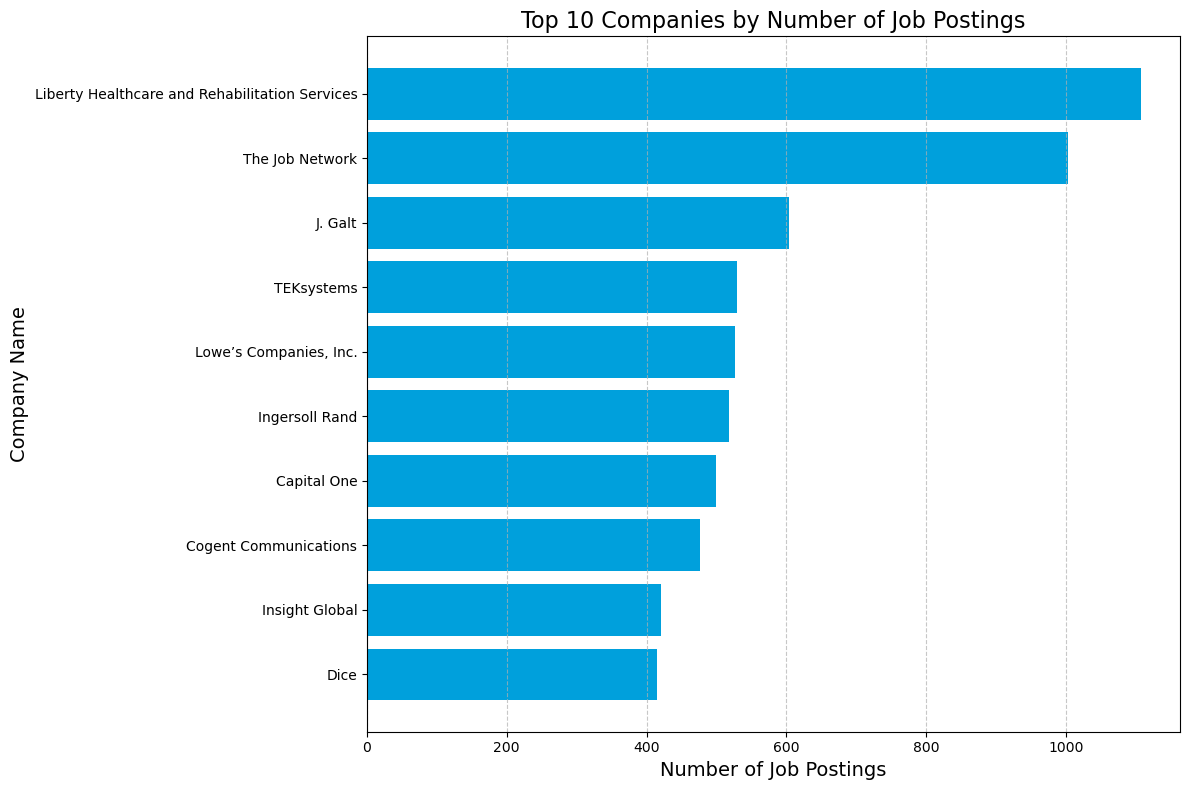

In [28]:
import matplotlib.pyplot as plt

# Sample Data (Replace with Actual Data)
companies = ['Liberty Healthcare and Rehabilitation Services', 'The Job Network', 'J. Galt', 'TEKsystems', 
             'Lowe’s Companies, Inc.', 'Ingersoll Rand', 'Capital One', 'Cogent Communications', 
             'Insight Global', 'Dice']
posting_counts = [1108, 1003, 604, 529, 527, 518, 500, 476, 420, 415]

# LinkedIn Color Theme
linkedin_colors = ['#006699', '#00A0DC', '#313335', '#86888A', '#CACCCE']

# Create Horizontal Bar Chart
plt.figure(figsize=(12, 8))
plt.barh(companies, posting_counts, color=linkedin_colors[1])
plt.gca().invert_yaxis()  # Invert y-axis so the top company is at the top

# Add Titles and Labels
plt.title('Top 10 Companies by Number of Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings', fontsize=14)
plt.ylabel('Company Name', fontsize=14)

# Show Grid for Better Readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the Plot
plt.tight_layout()
plt.show()


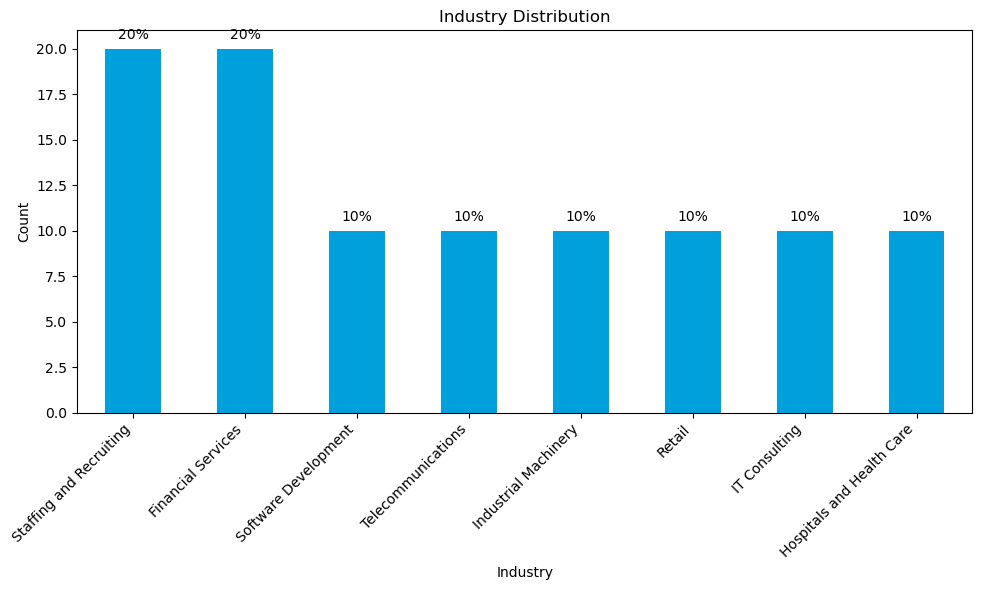

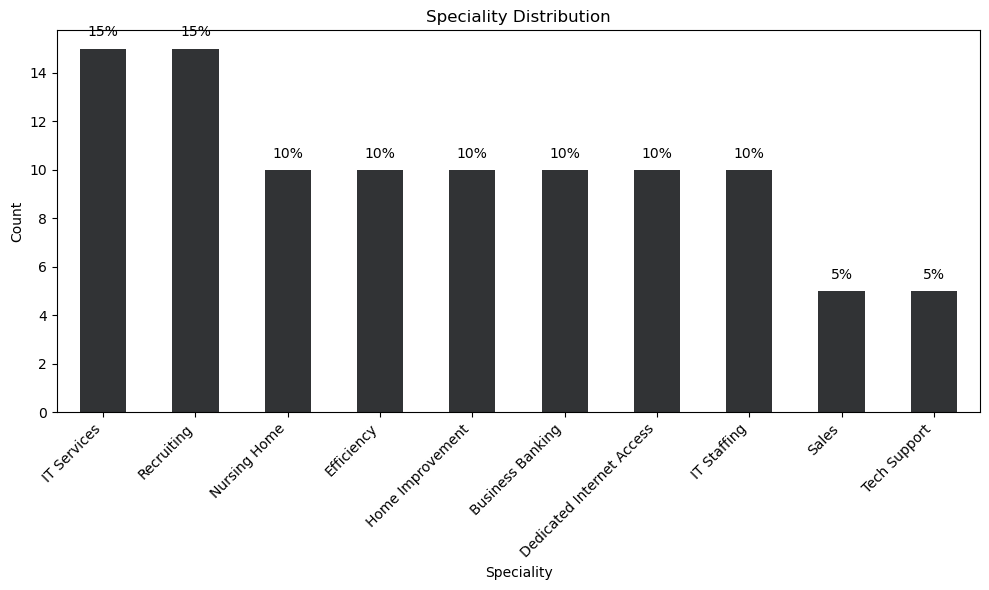

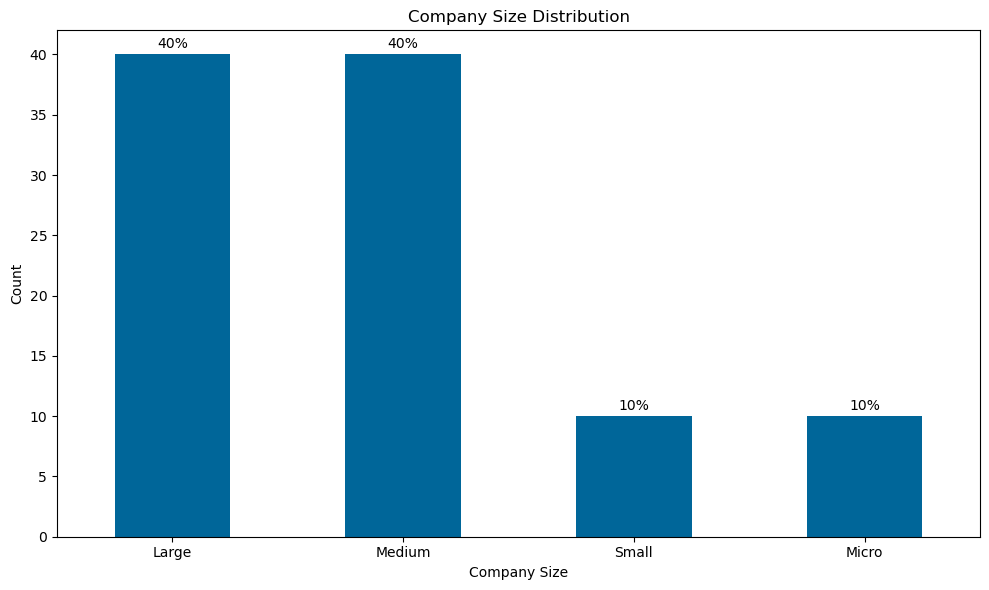

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data (Replace with Actual Data)
industry_counts = pd.Series([20, 20, 10, 10, 10, 10, 10, 10],
                            index=['Staffing and Recruiting', 'Financial Services', 'Software Development',
                                   'Telecommunications', 'Industrial Machinery', 'Retail',
                                   'IT Consulting', 'Hospitals and Health Care'])

speciality_counts = pd.Series([15, 15, 10, 10, 10, 10, 10, 10, 5, 5],
                              index=['IT Services', 'Recruiting', 'Nursing Home', 'Efficiency', 
                                     'Home Improvement', 'Business Banking', 'Dedicated Internet Access', 
                                     'IT Staffing', 'Sales', 'Tech Support'])

company_size_counts = pd.Series([40, 40, 10, 10], 
                                index=['Large', 'Medium', 'Small', 'Micro'])

# LinkedIn Color Palette
linkedin_colors = ['#006699', '#00A0DC', '#313335', '#86888A', '#CACCCE']

# --- Industry Distribution Bar Chart ---
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color=linkedin_colors[1])
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(industry_counts):
    plt.text(i, count + 0.5, f'{count}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# --- Speciality Distribution Bar Chart ---
plt.figure(figsize=(10, 6))
speciality_counts.plot(kind='bar', color=linkedin_colors[2])
plt.title('Speciality Distribution')
plt.xlabel('Speciality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, count in enumerate(speciality_counts):
    plt.text(i, count + 0.5, f'{count}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# --- Company Size Distribution Bar Chart ---
plt.figure(figsize=(10, 6))
company_size_counts.plot(kind='bar', color=linkedin_colors[0])
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, count in enumerate(company_size_counts):
    plt.text(i, count + 0.5, f'{count}%', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


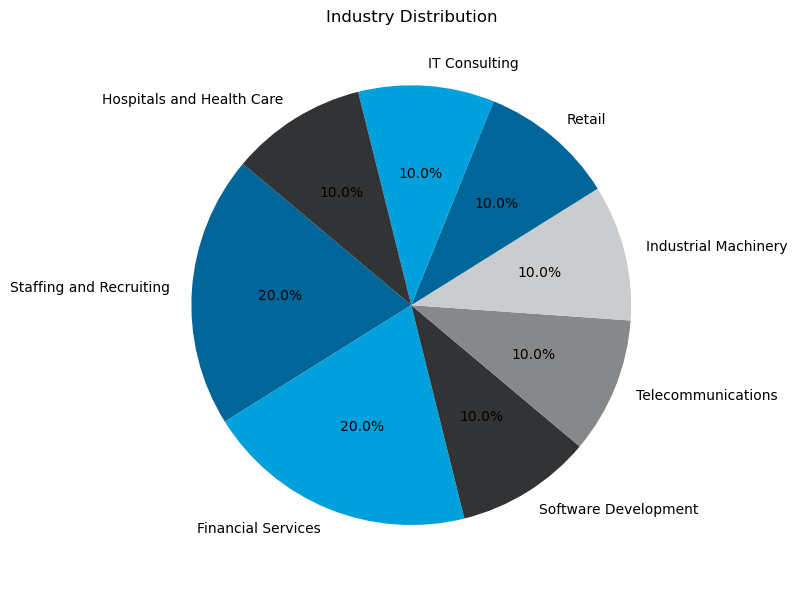

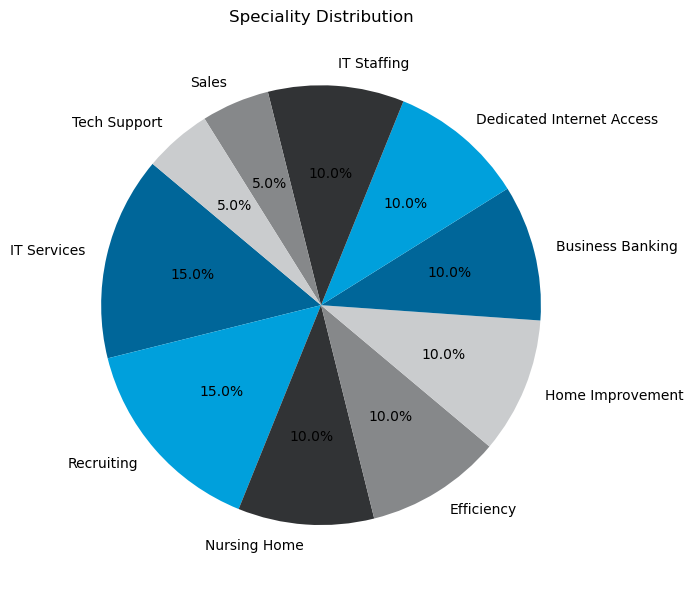

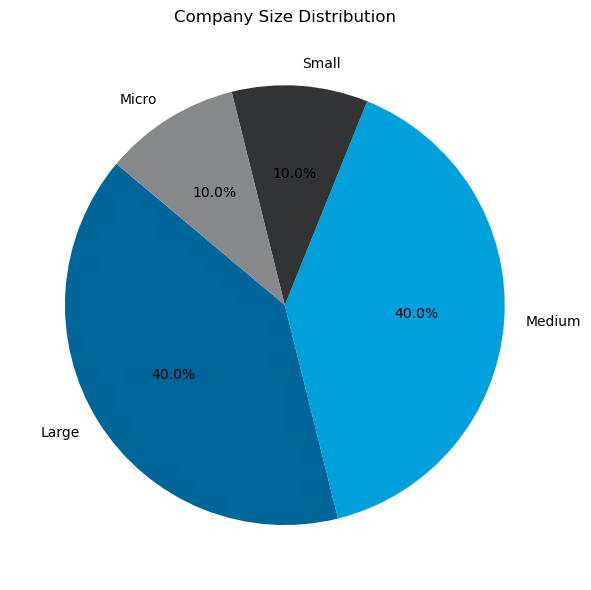

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data (Replace with Actual Data)
industry_counts = pd.Series([20, 20, 10, 10, 10, 10, 10, 10],
                            index=['Staffing and Recruiting', 'Financial Services', 'Software Development',
                                   'Telecommunications', 'Industrial Machinery', 'Retail',
                                   'IT Consulting', 'Hospitals and Health Care'])

speciality_counts = pd.Series([15, 15, 10, 10, 10, 10, 10, 10, 5, 5],
                              index=['IT Services', 'Recruiting', 'Nursing Home', 'Efficiency', 
                                     'Home Improvement', 'Business Banking', 'Dedicated Internet Access', 
                                     'IT Staffing', 'Sales', 'Tech Support'])

company_size_counts = pd.Series([40, 40, 10, 10], 
                                index=['Large', 'Medium', 'Small', 'Micro'])

# LinkedIn Color Palette
linkedin_colors = ['#006699', '#00A0DC', '#313335', '#86888A', '#CACCCE']

# --- Industry Distribution Pie Chart ---
plt.figure(figsize=(8, 6))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140, colors=linkedin_colors)
plt.title('Industry Distribution')
plt.tight_layout()
plt.show()

# --- Speciality Distribution Pie Chart ---
plt.figure(figsize=(8, 6))
plt.pie(speciality_counts, labels=speciality_counts.index, autopct='%1.1f%%', startangle=140, colors=linkedin_colors)
plt.title('Speciality Distribution')
plt.tight_layout()
plt.show()

# --- Company Size Distribution Pie Chart ---
plt.figure(figsize=(8, 6))
plt.pie(company_size_counts, labels=company_size_counts.index, autopct='%1.1f%%', startangle=140, colors=linkedin_colors)
plt.title('Company Size Distribution')
plt.tight_layout()
plt.show()


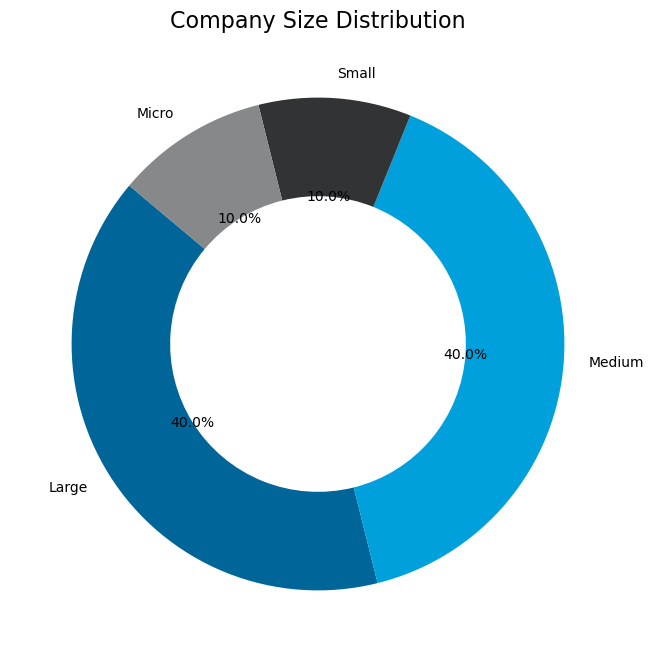

In [31]:
import matplotlib.pyplot as plt

# Sample Data (Replace with Actual Data)
sizes = [40, 40, 10, 10]
labels = ['Large', 'Medium', 'Small', 'Micro']
colors = ['#006699', '#00A0DC', '#313335', '#86888A']

# Create a Hollow Pie Chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.4))

# Add a Title
plt.title('Company Size Distribution', fontsize=16)

# Display the Chart
plt.show()


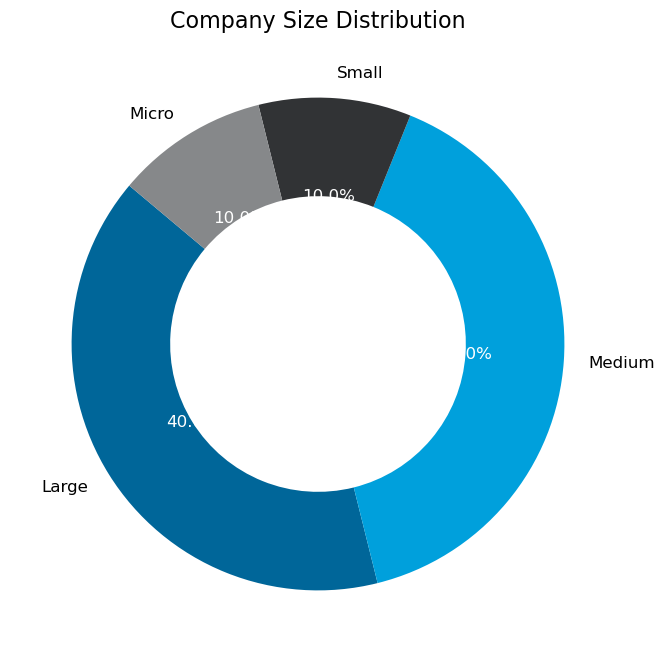

In [32]:
import matplotlib.pyplot as plt

# Sample Data (Replace with Actual Data)
sizes = [40, 40, 10, 10]
labels = ['Large', 'Medium', 'Small', 'Micro']
colors = ['#006699', '#00A0DC', '#313335', '#86888A']

# Create a Hollow Pie Chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops={'color': 'black', 'fontsize': 12}
)

# Improve Autotext Readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

# Add a Title
plt.title('Company Size Distribution', fontsize=16)

# Display the Chart
plt.show()


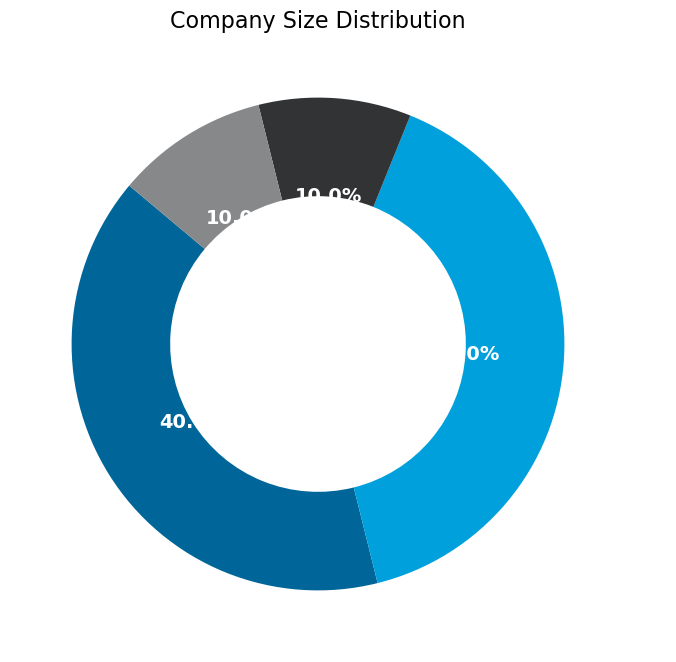

In [33]:
import matplotlib.pyplot as plt

# Sample Data (Replace with Actual Data)
sizes = [40, 40, 10, 10]
labels = ['Large', 'Medium', 'Small', 'Micro']
colors = ['#006699', '#00A0DC', '#313335', '#86888A']

# Create a Hollow Pie Chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops={'color': 'white', 'fontsize': 14}
)

# Improve Autotext Position and Readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

# Add a Title
plt.title('Company Size Distribution', fontsize=16)

# Display the Chart
plt.show()


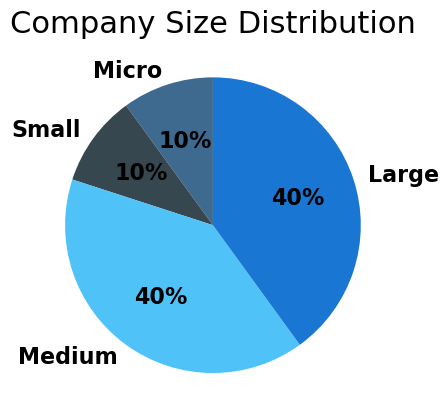

In [39]:
# Re-import necessary libraries after reset
import matplotlib.pyplot as plt

# Data for the chart
sizes = [10, 10, 40, 40]
labels = ["Micro", "Small", "Medium", "Large"]
colors = ['#3E6A8F', '#37474F', '#4FC3F7', '#1976D2']

# Create the pie chart with the specified colors and larger text labels
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, colors=colors,
       textprops={'fontsize': 16, 'weight': 'bold'})

# Set title for the chart
ax.set_title("Company Size Distribution", fontsize=22)

# Display the chart
plt.show()


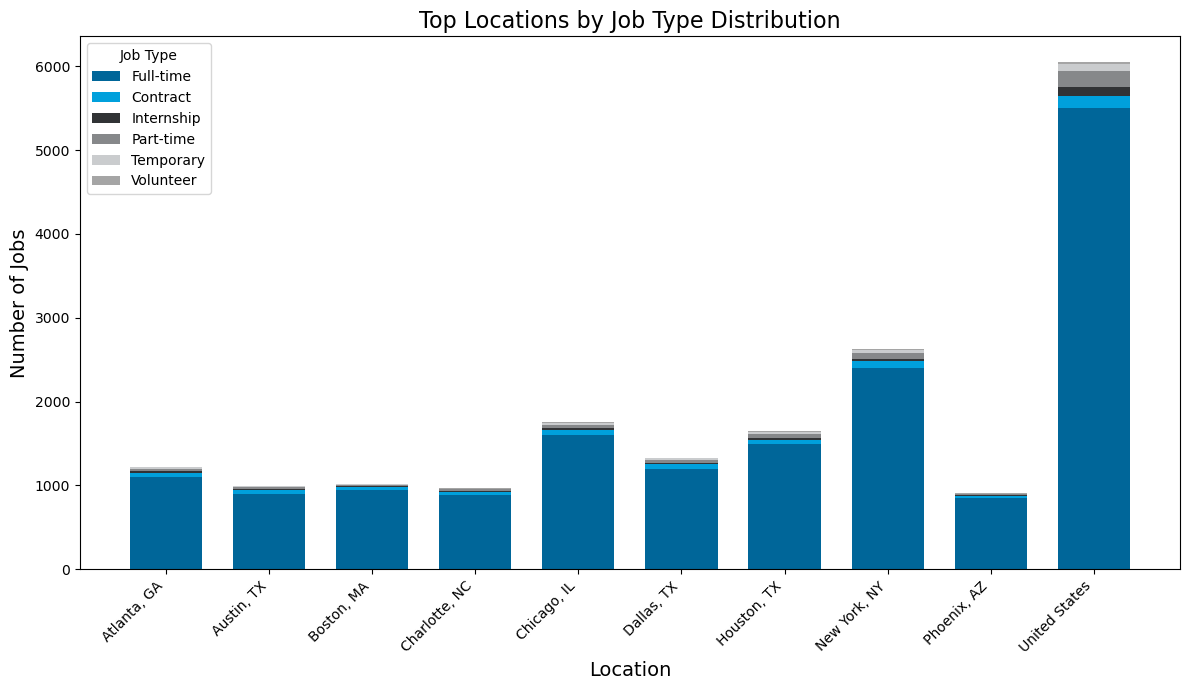

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data (Replace with Actual Data)
locations = ['Atlanta, GA', 'Austin, TX', 'Boston, MA', 'Charlotte, NC', 'Chicago, IL', 
             'Dallas, TX', 'Houston, TX', 'New York, NY', 'Phoenix, AZ', 'United States']

# Job Type Counts (Sample Data)
full_time = [1100, 900, 950, 890, 1600, 1200, 1500, 2400, 850, 5500]
contract = [50, 40, 30, 35, 60, 55, 45, 80, 25, 150]
internship = [20, 15, 10, 12, 25, 18, 22, 30, 8, 100]
part_time = [30, 25, 20, 18, 40, 35, 50, 70, 15, 200]
temporary = [15, 12, 10, 8, 20, 18, 22, 35, 5, 80]
volunteer = [5, 3, 2, 2, 7, 5, 6, 10, 1, 25]

# Stack the Data
x = np.arange(len(locations))
width = 0.7

# LinkedIn Color Theme
colors = {
    'Full-time': '#006699',
    'Contract': '#00A0DC',
    'Internship': '#313335',
    'Part-time': '#86888A',
    'Temporary': '#CACCCE',
    'Volunteer': '#A5A5A5'
}

# Plot the Stacked Bar Chart
plt.figure(figsize=(12, 7))

plt.bar(x, full_time, width, label='Full-time', color=colors['Full-time'])
plt.bar(x, contract, width, bottom=np.array(full_time), label='Contract', color=colors['Contract'])
plt.bar(x, internship, width, bottom=np.array(full_time) + np.array(contract), label='Internship', color=colors['Internship'])
plt.bar(x, part_time, width, bottom=np.array(full_time) + np.array(contract) + np.array(internship), label='Part-time', color=colors['Part-time'])
plt.bar(x, temporary, width, bottom=np.array(full_time) + np.array(contract) + np.array(internship) + np.array(part_time), label='Temporary', color=colors['Temporary'])
plt.bar(x, volunteer, width, bottom=np.array(full_time) + np.array(contract) + np.array(internship) + np.array(part_time) + np.array(temporary), label='Volunteer', color=colors['Volunteer'])

# Add Titles and Labels
plt.title('Top Locations by Job Type Distribution', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=14)
plt.xticks(x, locations, rotation=45, ha='right')
plt.legend(title='Job Type', loc='upper left')

# Display the Plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Replace with your actual file path)
followers_df = pd.read_csv('/path/to/your/company_followers.csv')

# Preview the dataset to check its structure
print(followers_df.head())

# Sort the data by followers count in descending order
followers_df = followers_df.sort_values(by='followers_count', ascending=False).head(20)  # Top 20 companies for clarity

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(followers_df['company_name'], followers_df['followers_count'], color='#00A0DC')

# Add titles and labels
plt.title('Top Companies by Number of Followers', fontsize=16)
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of Followers', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/companies.csv')
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/employee_counts.csv')

# Inspect the datasets
print("Companies:")
print(companies.head())
print("\nEmployee Counts:")
print(employee_counts.head())

# Merge datasets on 'company_id'
merged_df = pd.merge(companies, employee_counts, on='company_id')

# Check relevant columns in merged dataframe
print("\nMerged DataFrame:")
print(merged_df.head())

# Assuming the columns are 'name' for company name and 'follower_count' for followers
followers_by_company = merged_df[['name', 'follower_count']].dropna()

# Sort by follower count and get the top 20 companies
top_companies = followers_by_company.sort_values(by='follower_count', ascending=False).head(20)

print(f"Number of entries with non-null follower counts: {len(followers_by_company)}")




Companies:
   company_id                        name  \
0        1009                         IBM   
1        1016               GE HealthCare   
2        1025  Hewlett Packard Enterprise   
3        1028                      Oracle   
4        1033                   Accenture   

                                         description  company_size  state  \
0  At IBM, we do more than work. We create. We cr...           7.0     NY   
1  Every day millions of people feel the impact o...           7.0      0   
2  Official LinkedIn of Hewlett Packard Enterpris...           7.0  Texas   
3  We’re a cloud technology company that provides...           7.0  Texas   
4  Accenture is a leading global professional ser...           7.0      0   

  country              city zip_code                                address  \
0      US  Armonk, New York    10504  International Business Machines Corp.   
1      US           Chicago        0                                      -   
2      US         

In [42]:
print(companies['company_id'].nunique())
print(employee_counts['company_id'].nunique())

merged_df = pd.merge(companies, employee_counts, on='company_id', how='inner')
print(f"Number of companies after merge: {len(merged_df)}")

print(companies['company_id'].dtype)
print(employee_counts['company_id'].dtype)

print(merged_df['follower_count'].describe())

top_companies = merged_df[['name', 'follower_count']].dropna().sort_values(by='follower_count', ascending=False).head(20)
print(top_companies)


24473
24473
Number of companies after merge: 35787
int64
int64
count    3.578700e+04
mean     2.012616e+05
std      1.114733e+06
min      0.000000e+00
25%      2.738000e+03
50%      1.617800e+04
75%      7.412950e+04
max      3.270284e+07
Name: follower_count, dtype: float64
         name  follower_count
328    Google        32702835
327    Google        32690418
326    Google        32682030
325    Google        32681190
324    Google        32546238
448    Amazon        30832772
447    Amazon        30823843
446    Amazon        30818482
445    Amazon        30817955
443    Amazon        30761660
444    Amazon        30761659
442    Amazon        30753088
441    Amazon        30752915
440    Amazon        30749506
439    Amazon        30725652
213  LinkedIn        26255390
212  LinkedIn        26233889
211  LinkedIn        26228518
210  LinkedIn        26185274
209  LinkedIn        26132967


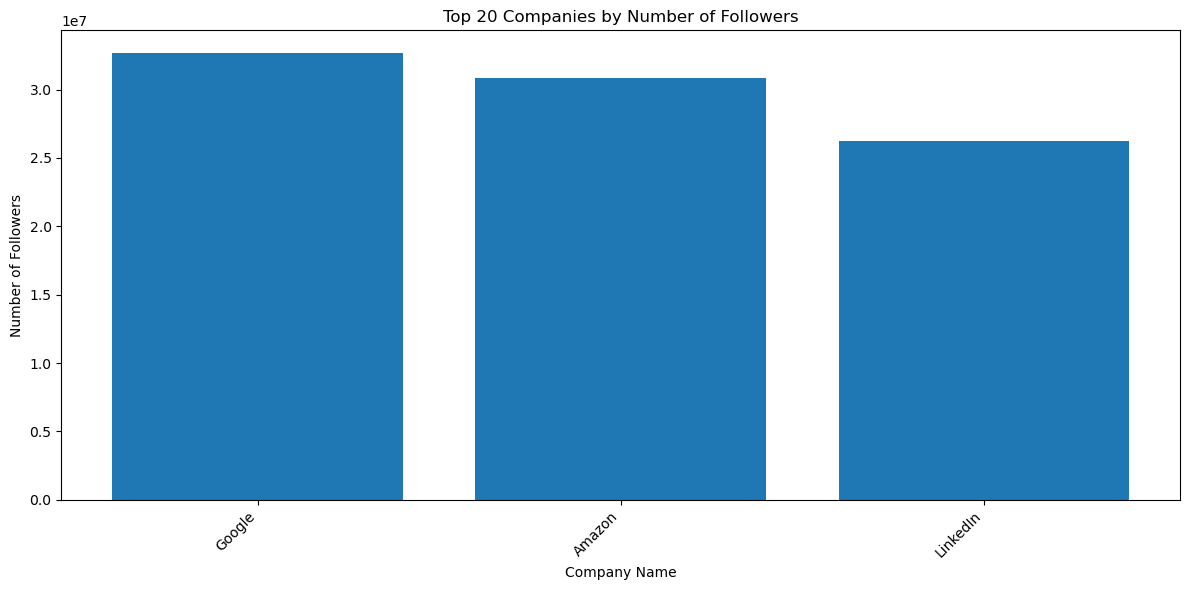

In [43]:
# Plotting the top 20 companies by followers
plt.figure(figsize=(12, 6))
plt.bar(top_companies['name'], top_companies['follower_count'])
plt.xlabel('Company Name')
plt.ylabel('Number of Followers')
plt.title('Top 20 Companies by Number of Followers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


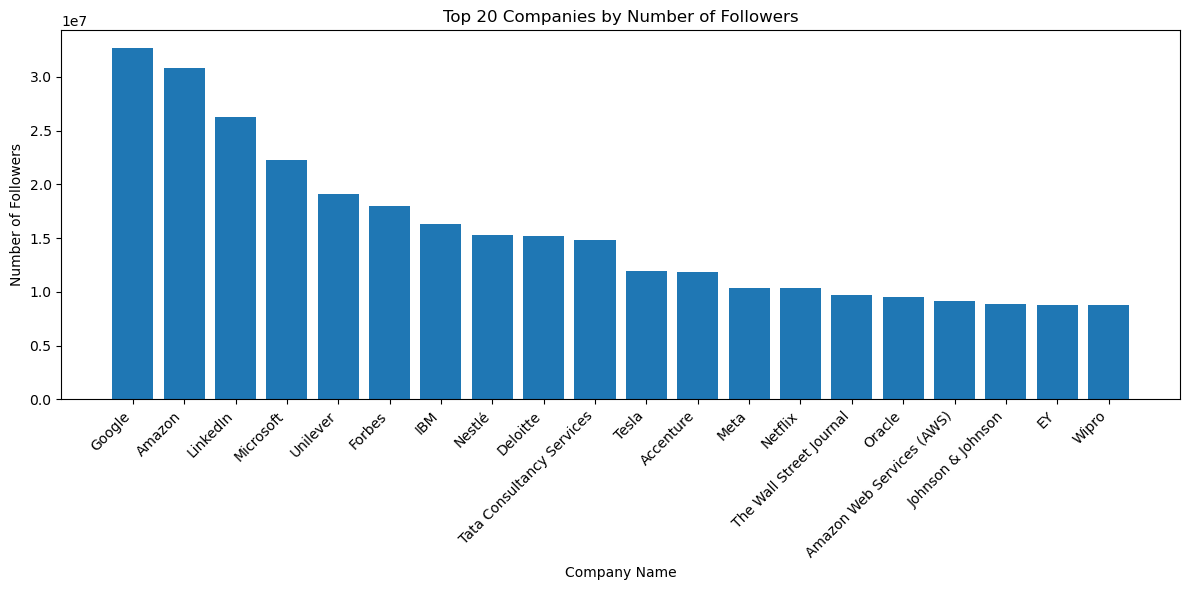

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/companies.csv')
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/employee_counts.csv')

# Merge datasets on 'company_id'
merged_df = pd.merge(companies, employee_counts, on='company_id')

# Group by company name and take the maximum follower count
followers_by_company = merged_df[['name', 'follower_count']].dropna()
followers_by_company = followers_by_company.groupby('name', as_index=False)['follower_count'].max()

# Sort by follower count and get the top 20 companies
top_companies = followers_by_company.sort_values(by='follower_count', ascending=False).head(20)

# Plotting the top 20 companies by followers
plt.figure(figsize=(12, 6))
plt.bar(top_companies['name'], top_companies['follower_count'])
plt.xlabel('Company Name')
plt.ylabel('Number of Followers')
plt.title('Top 20 Companies by Number of Followers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load postings dataset
postings = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/postings.csv')

# Inspect the dataset to check relevant columns
print(postings.head())

     job_id            company_name  \
0    921716   Corcoran Sawyer Smith   
1   1829192                     NaN   
2  10998357  The National Exemplar    
3  23221523  Abrams Fensterman, LLP   
4  35982263                     NaN   

                                               title  \
0                              Marketing Coordinator   
1                  Mental Health Therapist/Counselor   
2                        Assitant Restaurant Manager   
3  Senior Elder Law / Trusts and Estates Associat...   
4                                 Service Technician   

                                         description  max_salary pay_period  \
0  Job descriptionA leading real estate firm in N...        20.0     HOURLY   
1  At Aspen Therapy and Wellness , we are committ...        50.0     HOURLY   
2  The National Exemplar is accepting application...     65000.0     YEARLY   
3  Senior Associate Attorney - Elder Law / Trusts...    175000.0     YEARLY   
4  Looking for HVAC service tech 

In [46]:
print(postings.columns)

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')


/var/folders/fc/38_dw8nj4_xb_8qlr4851tlm0000gn/T/ipykernel_34487/1482228173.py:33: UserWarning: Glyph 129521 (\N{BRICK}) missing from current font.
  plt.tight_layout()
/var/folders/fc/38_dw8nj4_xb_8qlr4851tlm0000gn/T/ipykernel_34487/1482228173.py:33: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  plt.tight_layout()
/var/folders/fc/38_dw8nj4_xb_8qlr4851tlm0000gn/T/ipykernel_34487/1482228173.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/var/folders/fc/38_dw8nj4_xb_8qlr4851tlm0000gn/T/ipykernel_34487/1482228173.py:33: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from current font.
  plt.tight_layout()
/var/folders/fc/38_dw8nj4_xb_8qlr4851tlm0000gn/T/ipykernel_34487/1482228173.py:33: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from current font.
  plt.tight_layout()
/var/folders/fc/38_dw8nj4_xb_8qlr4851tlm0000gn/T/ipykernel_34487/1482228173.py:33: UserWarning:

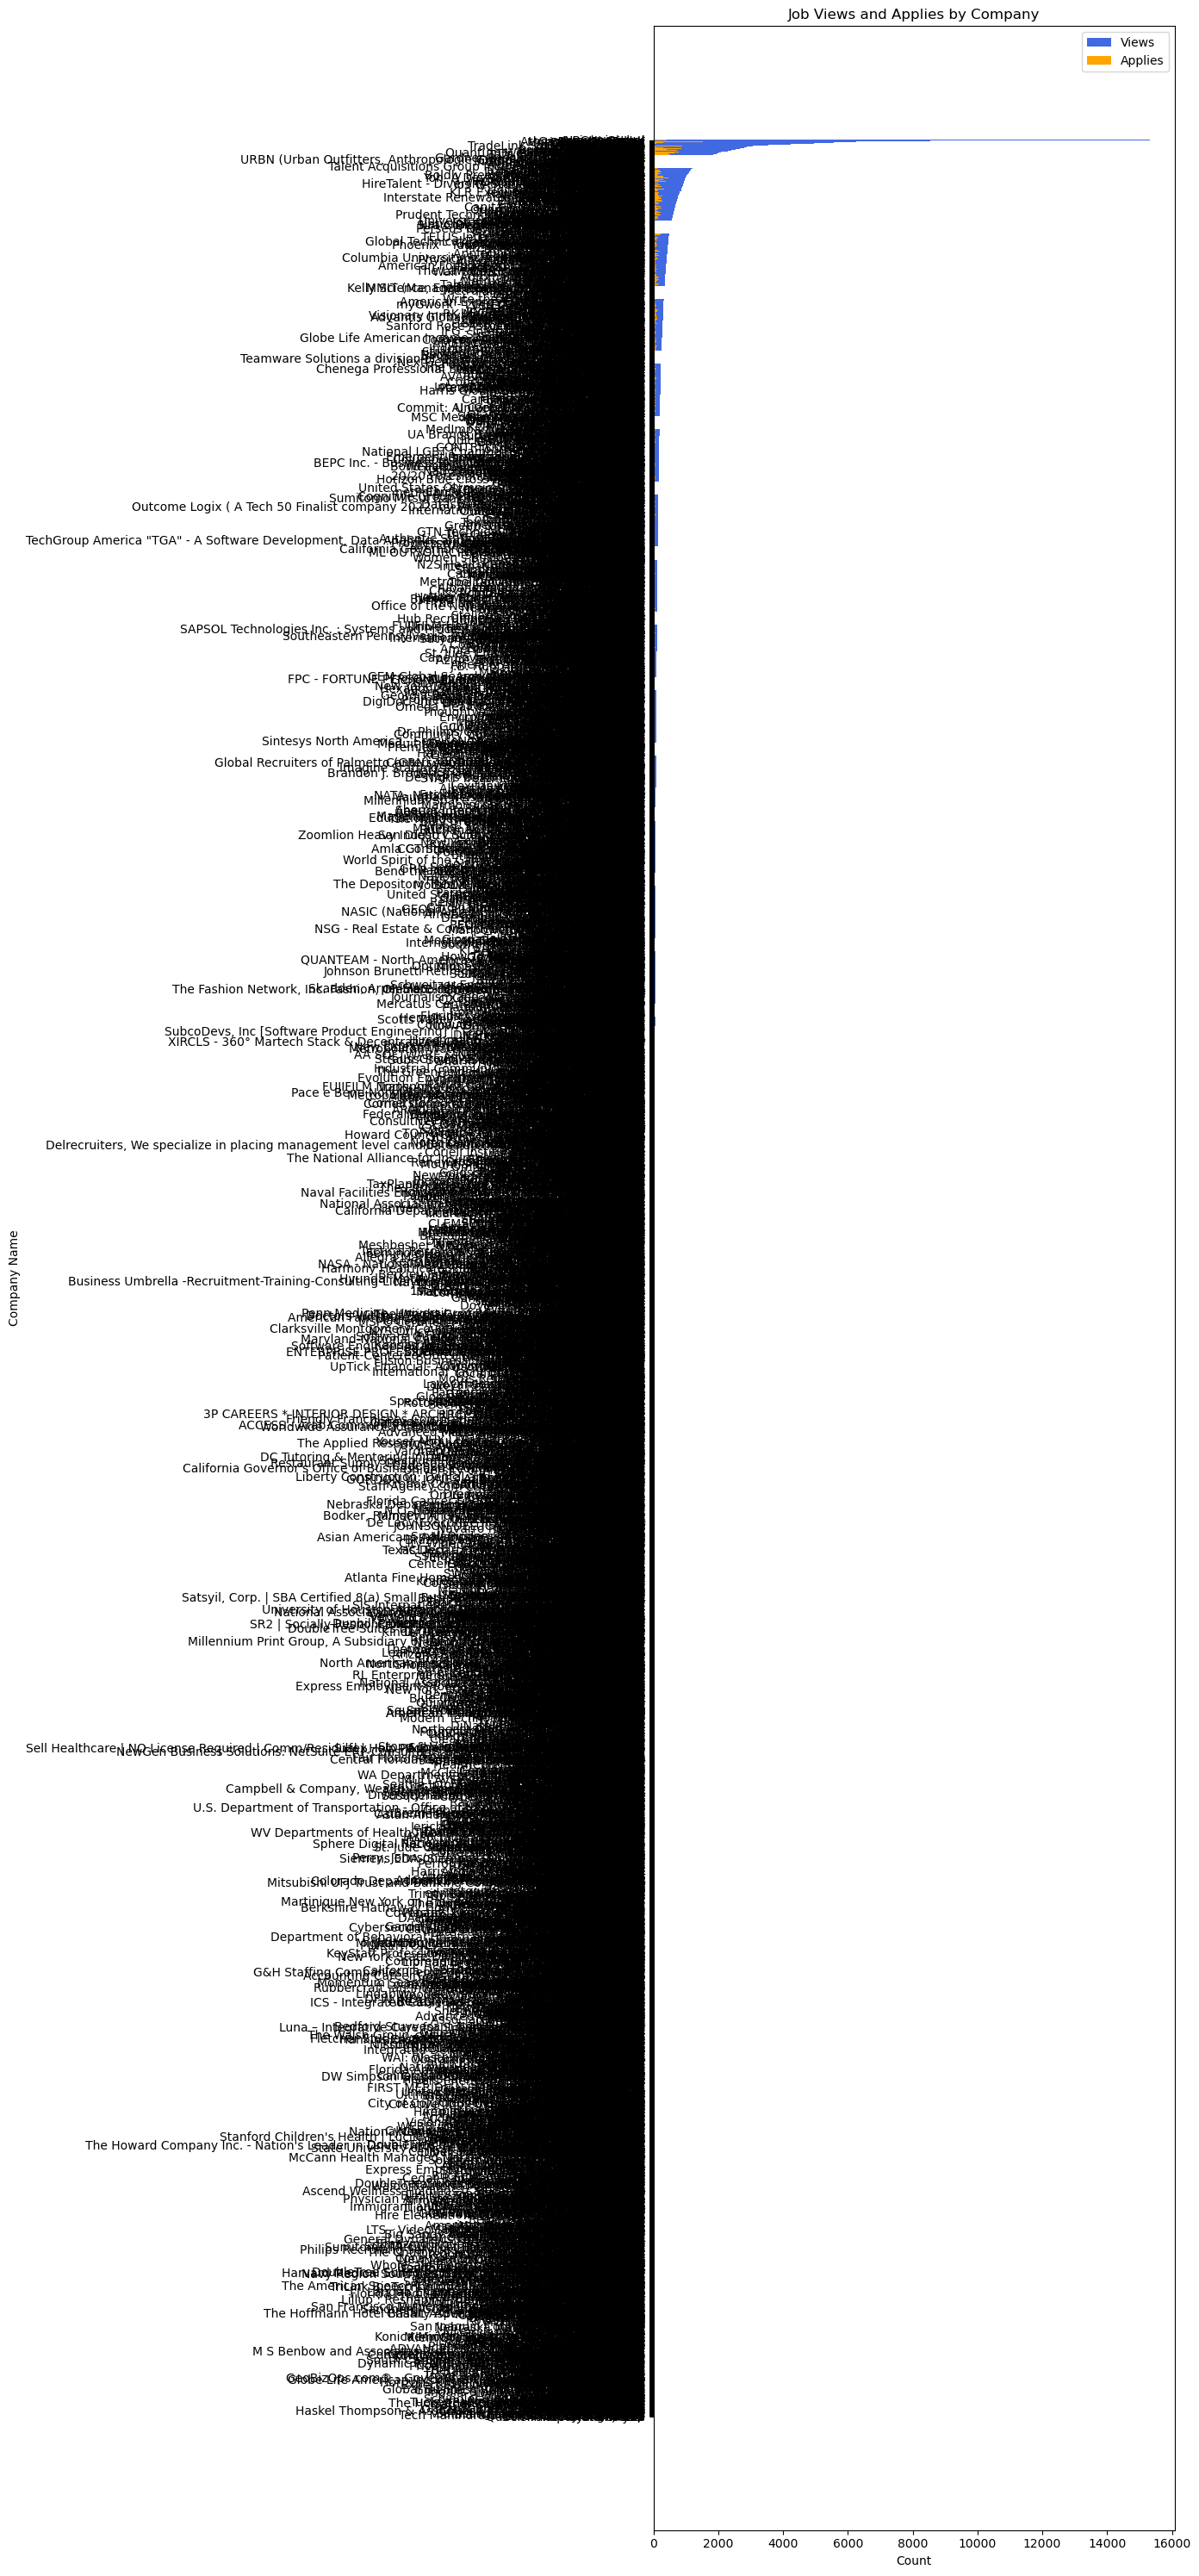

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the postings dataset
postings = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/postings.csv')

# Filter necessary columns and drop rows with missing values
job_metrics = postings[['company_name', 'views', 'applies']].dropna()

# Group by company name and sum the views and applies
job_metrics_grouped = job_metrics.groupby('company_name', as_index=False)[['views', 'applies']].sum()

# Sort the data by views in descending order
job_metrics_grouped = job_metrics_grouped.sort_values(by='views', ascending=False)

# Plotting the data as a horizontal bar chart
plt.figure(figsize=(14, 30))  # Adjust the height to fit all companies

# Plot views and applies side-by-side
y = range(len(job_metrics_grouped))
plt.barh(y, job_metrics_grouped['views'], label='Views', color='royalblue')
plt.barh(y, job_metrics_grouped['applies'], label='Applies', color='orange')

# Adding labels and title
plt.ylabel('Company Name')
plt.xlabel('Count')
plt.title('Job Views and Applies by Company')
plt.yticks(y, job_metrics_grouped['company_name'])
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [48]:
import plotly.express as px

# Create an interactive plot
fig = px.bar(job_metrics_grouped, 
             y='company_name', 
             x=['views', 'applies'], 
             title='Job Views and Applies by Company',
             orientation='h')

fig.show()


                                        title    views  applies  \
4993                      Executive Assistant  26058.0   1136.0   
3436                             Data Analyst  15154.0   5163.0   
4986       Executive Administrative Assistant  11638.0    319.0   
13421                       Software Engineer  11311.0   3496.0   
10221                         Project Manager  10741.0   2083.0   
1748                         Business Analyst  10537.0   2768.0   
12023      Senior Business Operations Manager   9975.0    156.0   
3508                            Data Engineer   9101.0   3867.0   
3298                 Customer Success Manager   8506.0    710.0   
2305                  Chief Operating Officer   6286.0    205.0   
584                  Administrative Assistant   6065.0   1170.0   
5877                         Graphic Designer   6021.0    565.0   
14491                    Supply Chain Analyst   5992.0    345.0   
369                         Account Executive   5986.0    868.

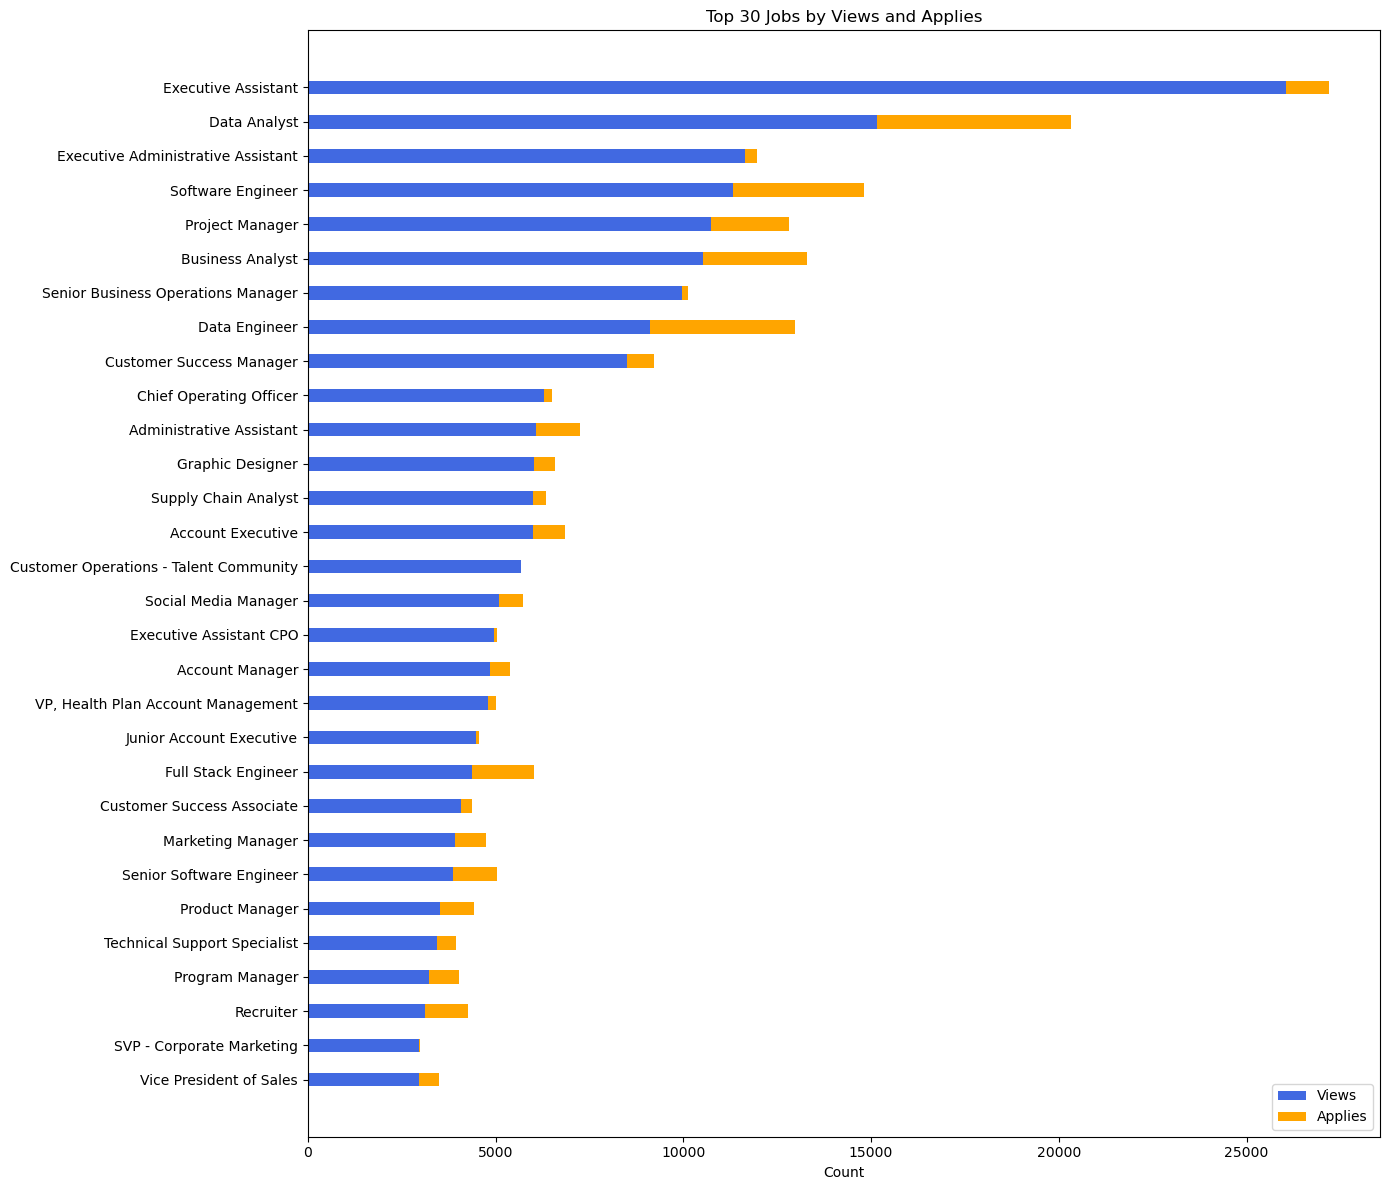

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the postings dataset
postings = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/postings.csv')

# Filter necessary columns and drop rows with missing values
job_metrics = postings[['title', 'views', 'applies']].dropna()

# Group by job title and sum views and applies
job_metrics_grouped = job_metrics.groupby('title', as_index=False)[['views', 'applies']].sum()

# Sort by views to get the top 50 jobs
top_jobs = job_metrics_grouped.sort_values(by='views', ascending=False).head(30)

# Truncate long job titles for better readability
top_jobs['short_title'] = top_jobs['title'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)

# Display the resulting DataFrame
print(top_jobs.head(30))

# Plotting the data as a horizontal bar chart
plt.figure(figsize=(14, 12))

# Plot views and applies side-by-side
y = range(len(top_jobs))
plt.barh(y, top_jobs['views'], height=0.4, label='Views', color='royalblue')
plt.barh(y, top_jobs['applies'], height=0.4, label='Applies', color='orange', left=top_jobs['views'])

# Adding labels and title
plt.xlabel('Count')
plt.title('Top 30 Jobs by Views and Applies')
plt.yticks(y, top_jobs['short_title'])
plt.gca().invert_yaxis()
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the postings dataset
postings = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/postings.csv')

# Filter necessary columns and drop rows with missing values
job_metrics = postings[['title', 'views', 'applies']].dropna()

# Group by job title and sum the views and applies
job_metrics_grouped = job_metrics.groupby('title', as_index=False).sum()

# Sort by views to get the top 30 jobs
top_30_jobs = job_metrics_grouped.sort_values(by='views', ascending=False).head(30)

# Print the top 30 jobs to verify the data
print(top_30_jobs)


                                        title    views  applies
4993                      Executive Assistant  26058.0   1136.0
3436                             Data Analyst  15154.0   5163.0
4986       Executive Administrative Assistant  11638.0    319.0
13421                       Software Engineer  11311.0   3496.0
10221                         Project Manager  10741.0   2083.0
1748                         Business Analyst  10537.0   2768.0
12023      Senior Business Operations Manager   9975.0    156.0
3508                            Data Engineer   9101.0   3867.0
3298                 Customer Success Manager   8506.0    710.0
2305                  Chief Operating Officer   6286.0    205.0
584                  Administrative Assistant   6065.0   1170.0
5877                         Graphic Designer   6021.0    565.0
14491                    Supply Chain Analyst   5992.0    345.0
369                         Account Executive   5986.0    868.0
3241   Customer Operations - Talent Comm

In [58]:
top_30_jobs.to_csv('/Users/liuzhiying/Desktop/top_30_jobs_views_applies.csv', index=False)


In [57]:
import pandas as pd

# Show all rows in the DataFrame
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(top_30_jobs)


                                        title    views  applies
4993                      Executive Assistant  26058.0   1136.0
3436                             Data Analyst  15154.0   5163.0
4986       Executive Administrative Assistant  11638.0    319.0
13421                       Software Engineer  11311.0   3496.0
10221                         Project Manager  10741.0   2083.0
1748                         Business Analyst  10537.0   2768.0
12023      Senior Business Operations Manager   9975.0    156.0
3508                            Data Engineer   9101.0   3867.0
3298                 Customer Success Manager   8506.0    710.0
2305                  Chief Operating Officer   6286.0    205.0
584                  Administrative Assistant   6065.0   1170.0
5877                         Graphic Designer   6021.0    565.0
14491                    Supply Chain Analyst   5992.0    345.0
369                         Account Executive   5986.0    868.0
3241   Customer Operations - Talent Comm

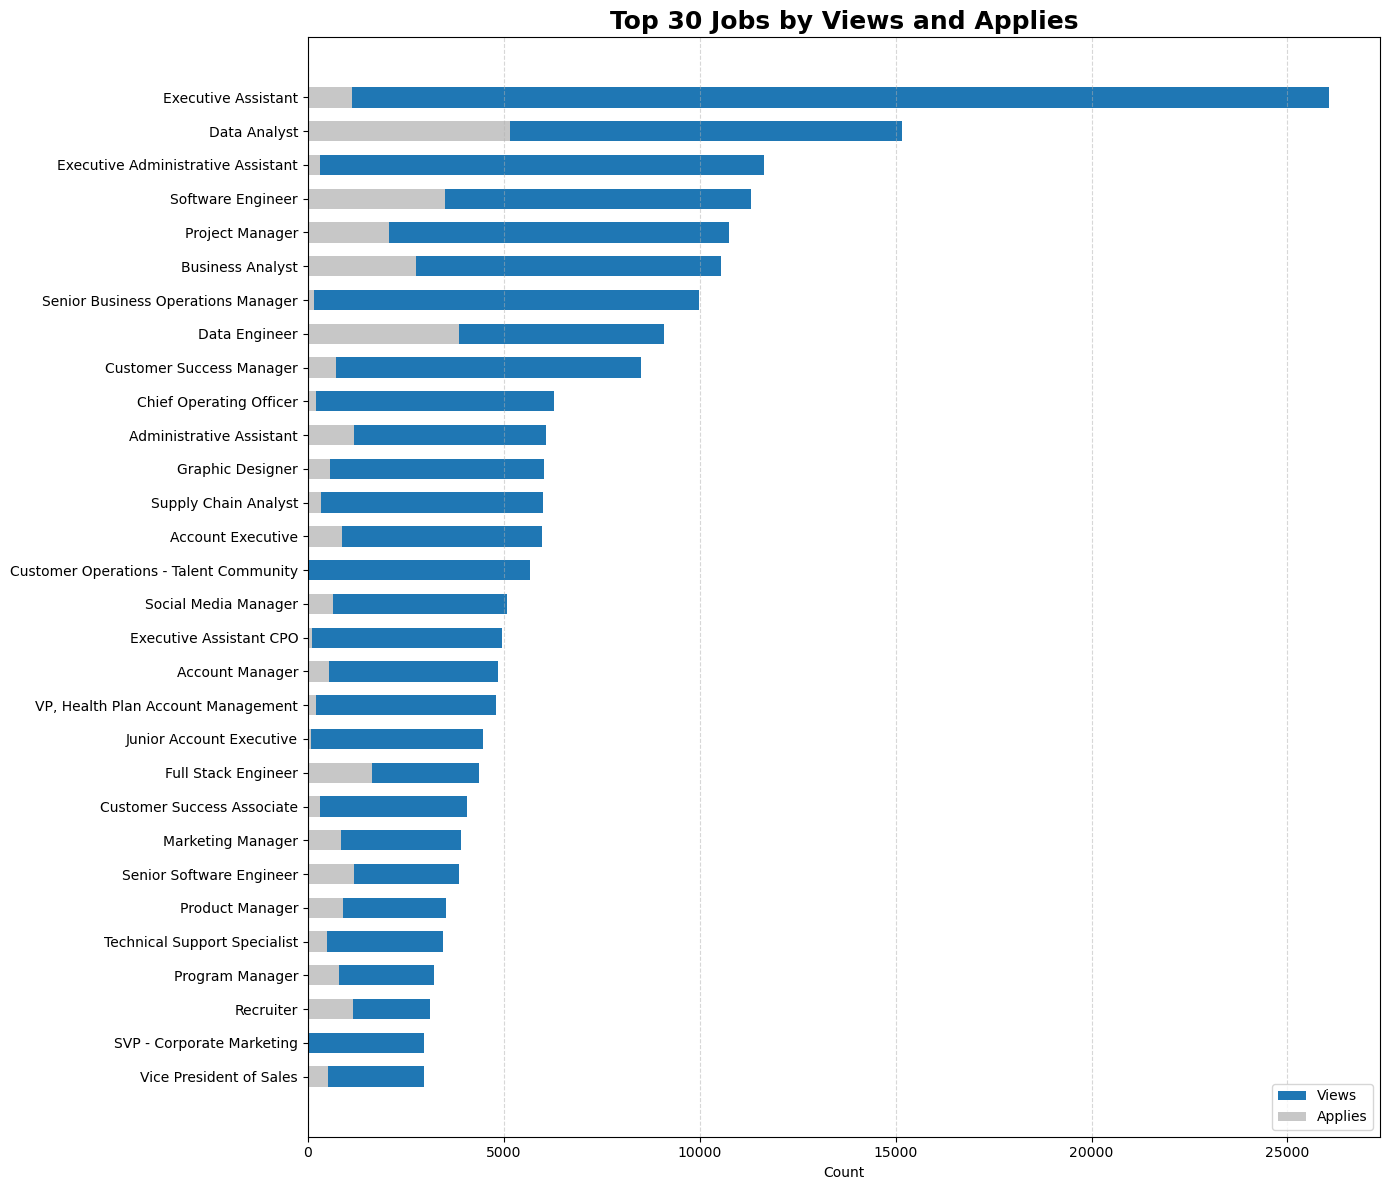

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the postings dataset
postings = pd.read_csv('/Users/liuzhiying/Desktop/Linkin/postings.csv')

# Filter necessary columns and drop rows with missing values
job_metrics = postings[['title', 'views', 'applies']].dropna()

# Group by job title and sum the views and applies
job_metrics_grouped = job_metrics.groupby('title', as_index=False).sum()

# Sort by views to get the top 30 jobs
top_30_jobs = job_metrics_grouped.sort_values(by='views', ascending=False).head(30)

# Plotting the data as a horizontal bar chart
plt.figure(figsize=(14, 12))

# Plot views and applies side-by-side
y = range(len(top_30_jobs))
plt.barh(y, top_30_jobs['views'], height=0.6, label='Views', color='#1f77b4')
plt.barh(y, top_30_jobs['applies'], height=0.6, label='Applies', color='#c7c7c7')

# Adding labels and title
plt.xlabel('Count')
plt.title('Top 30 Jobs by Views and Applies', fontsize=18, fontweight='bold')
plt.yticks(y, top_30_jobs['title'])
plt.gca().invert_yaxis()
plt.legend()

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/mnt/data/companies.csv')
employee_counts = pd.read_csv('/mnt/data/employee_counts.csv')
postings = pd.read_csv('/mnt/data/postings.csv')

# Merge companies with employee_counts to get followers
companies_followers = pd.merge(companies[['company_id', 'name']], employee_counts[['company_id', 'follower_count']], on='company_id')

# Group postings by company_id to get the number of job postings per company
job_postings = postings.groupby('company_id').size().reset_index(name='job_postings')

# Merge followers and job postings data
comparison_df = pd.merge(companies_followers, job_postings, on='company_id', how='inner')

# Sort by follower count and select the top 20 companies
top_20_comparison = comparison_df.sort_values(by='follower_count', ascending=False).head(20)

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot followers on the primary y-axis
ax1.bar(top_20_comparison['name'], top_20_comparison['follower_count'], color='royalblue', label='Followers')
ax1.set_xlabel('Company')
ax1.set_ylabel('Number of Followers', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for job postings
ax2 = ax1.twinx()
ax2.plot(top_20_comparison['name'], top_20_comparison['job_postings'], color='orange', marker='o', linestyle='-', linewidth=2, label='Job Postings')
ax2.set_ylabel('Number of Job Postings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legends
fig.suptitle('Comparison of Followers and Job Postings by Top 20 Companies', fontsize=16, fontweight='bold')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


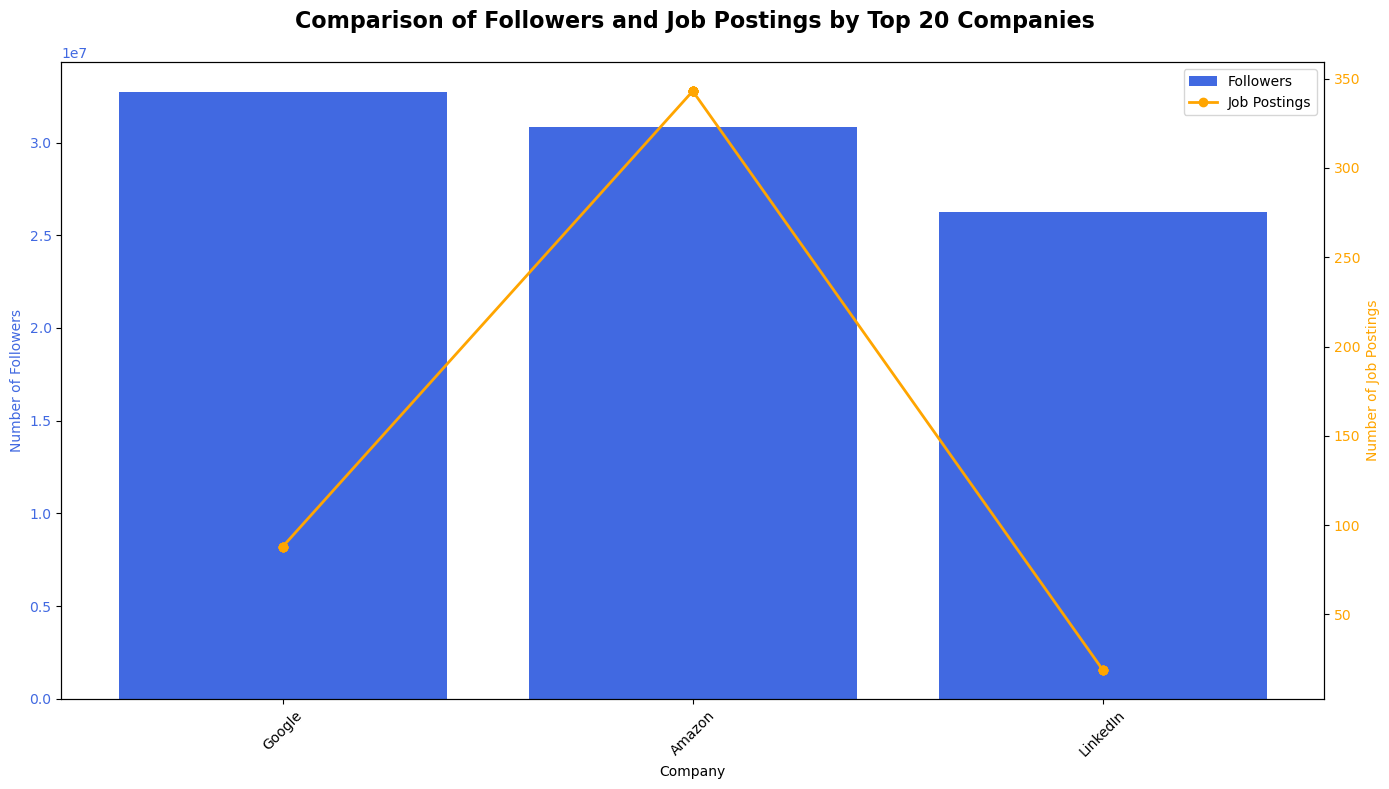

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/companies.csv')
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/employee_counts.csv')
postings = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/postings.csv')

# Merge companies with employee_counts to get followers
companies_followers = pd.merge(companies[['company_id', 'name']], employee_counts[['company_id', 'follower_count']], on='company_id')

# Group postings by company_id to get the number of job postings per company
job_postings = postings.groupby('company_id').size().reset_index(name='job_postings')

# Merge followers and job postings data
comparison_df = pd.merge(companies_followers, job_postings, on='company_id', how='inner')

# Sort by follower count and select the top 20 companies
top_20_comparison = comparison_df.sort_values(by='follower_count', ascending=False).head(20)

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot followers on the primary y-axis
ax1.bar(top_20_comparison['name'], top_20_comparison['follower_count'], color='royalblue', label='Followers')
ax1.set_xlabel('Company')
ax1.set_ylabel('Number of Followers', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for job postings
ax2 = ax1.twinx()
ax2.plot(top_20_comparison['name'], top_20_comparison['job_postings'], color='orange', marker='o', linestyle='-', linewidth=2, label='Job Postings')
ax2.set_ylabel('Number of Job Postings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legends
fig.suptitle('Comparison of Followers and Job Postings by Top 20 Companies', fontsize=16, fontweight='bold')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


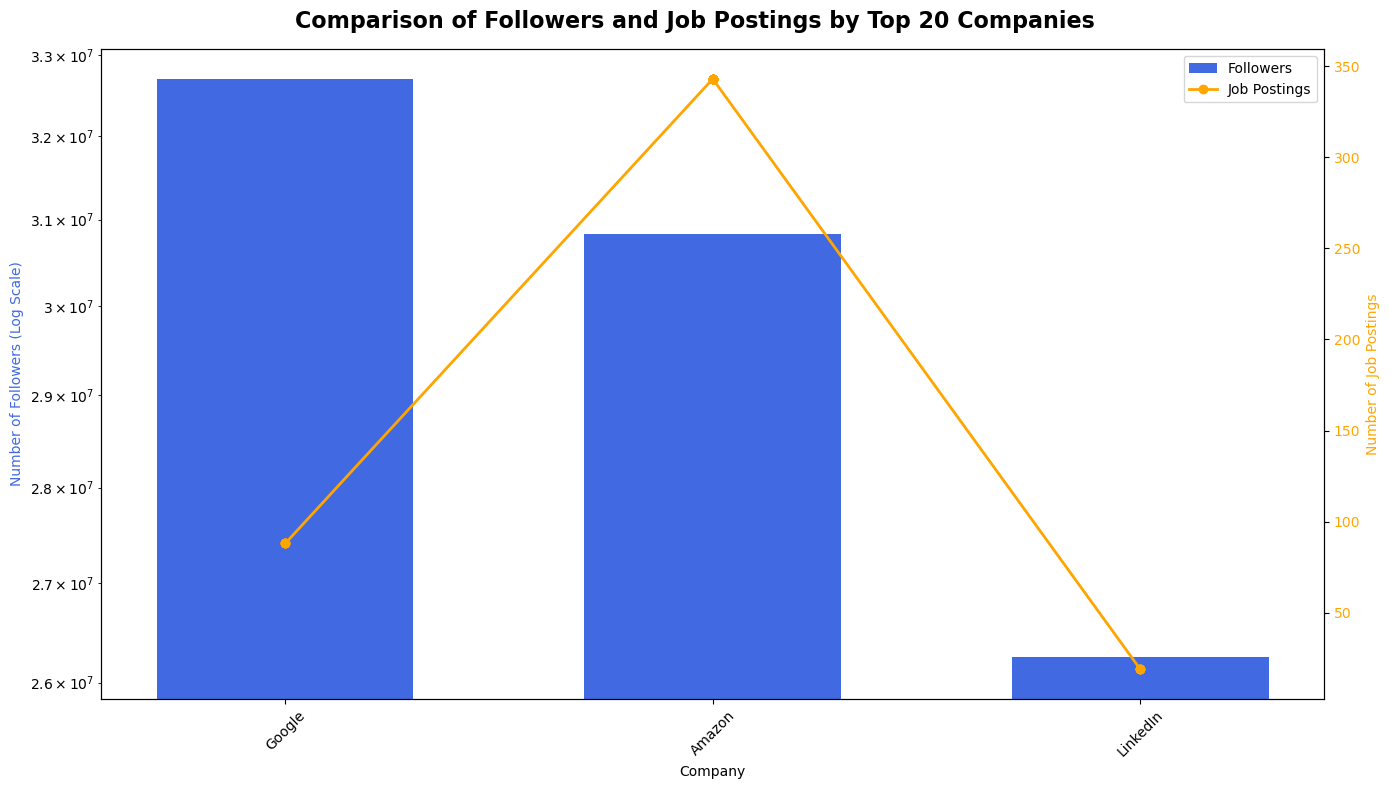

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/companies.csv')
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/employee_counts.csv')
postings = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/postings.csv')

# Merge companies with employee_counts to get follower count
companies_followers = pd.merge(companies[['company_id', 'name']], 
                                employee_counts[['company_id', 'follower_count']], 
                                on='company_id')

# Count job postings per company
job_postings_count = postings.groupby('company_id').size().reset_index(name='job_postings')

# Merge the followers data with job postings count
comparison_df = pd.merge(companies_followers, job_postings_count, on='company_id', how='inner')

# Sort by follower count and select the top 20 companies
top_20_comparison = comparison_df.sort_values(by='follower_count', ascending=False).head(20)

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot followers on the primary y-axis with a logarithmic scale
ax1.bar(top_20_comparison['name'], top_20_comparison['follower_count'], 
        color='royalblue', width=0.6, label='Followers')
ax1.set_xlabel('Company')
ax1.set_ylabel('Number of Followers (Log Scale)', color='royalblue')
ax1.set_yscale('log')  # Apply logarithmic scale
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for job postings
ax2 = ax1.twinx()
ax2.plot(top_20_comparison['name'], top_20_comparison['job_postings'], 
         color='orange', marker='o', linestyle='-', linewidth=2, label='Job Postings')
ax2.set_ylabel('Number of Job Postings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legends
fig.suptitle('Comparison of Followers and Job Postings by Top 20 Companies', fontsize=16, fontweight='bold')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


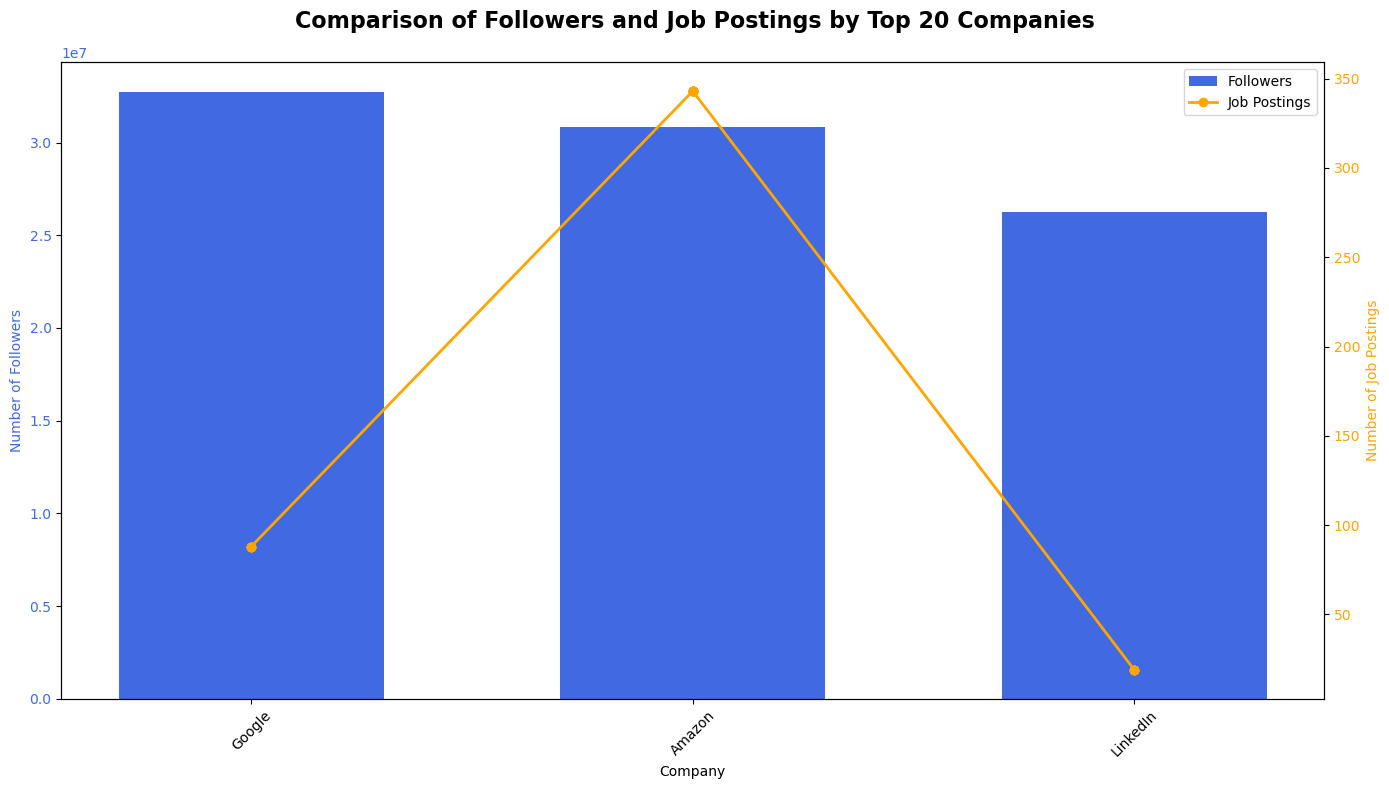

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/companies.csv')
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/employee_counts.csv')
postings = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/postings.csv')

# Step 1: Merge companies with employee_counts to get follower count
companies_followers = pd.merge(
    companies[['company_id', 'name']], 
    employee_counts[['company_id', 'follower_count']], 
    on='company_id'
)

# Step 2: Count job postings per company
job_postings_count = postings.groupby('company_id').size().reset_index(name='job_postings')

# Step 3: Merge the followers data with job postings count using a left join
comparison_df = pd.merge(companies_followers, job_postings_count, on='company_id', how='left')

# Step 4: Fill missing job postings with 0
comparison_df['job_postings'] = comparison_df['job_postings'].fillna(0)

# Step 5: Sort by follower count and select the top 20 companies
top_20_comparison = comparison_df.sort_values(by='follower_count', ascending=False).head(20)

# Step 6: Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot followers on the primary y-axis
ax1.bar(top_20_comparison['name'], top_20_comparison['follower_count'], 
        color='royalblue', label='Followers', width=0.6)
ax1.set_xlabel('Company')
ax1.set_ylabel('Number of Followers', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for job postings
ax2 = ax1.twinx()
ax2.plot(top_20_comparison['name'], top_20_comparison['job_postings'], 
         color='orange', marker='o', linestyle='-', linewidth=2, label='Job Postings')
ax2.set_ylabel('Number of Job Postings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legends
fig.suptitle('Comparison of Followers and Job Postings by Top 20 Companies', fontsize=16, fontweight='bold')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


In [4]:
pd.merge(companies_followers, job_postings_count, on='company_id', how='left')
comparison_df['job_postings'] = comparison_df['job_postings'].fillna(0)
print(top_20_comparison[['name', 'follower_count', 'job_postings']])


         name  follower_count  job_postings
328    Google        32702835            88
327    Google        32690418            88
326    Google        32682030            88
325    Google        32681190            88
324    Google        32546238            88
448    Amazon        30832772           343
447    Amazon        30823843           343
446    Amazon        30818482           343
445    Amazon        30817955           343
443    Amazon        30761660           343
444    Amazon        30761659           343
442    Amazon        30753088           343
441    Amazon        30752915           343
440    Amazon        30749506           343
439    Amazon        30725652           343
213  LinkedIn        26255390            19
212  LinkedIn        26233889            19
211  LinkedIn        26228518            19
210  LinkedIn        26185274            19
209  LinkedIn        26132967            19


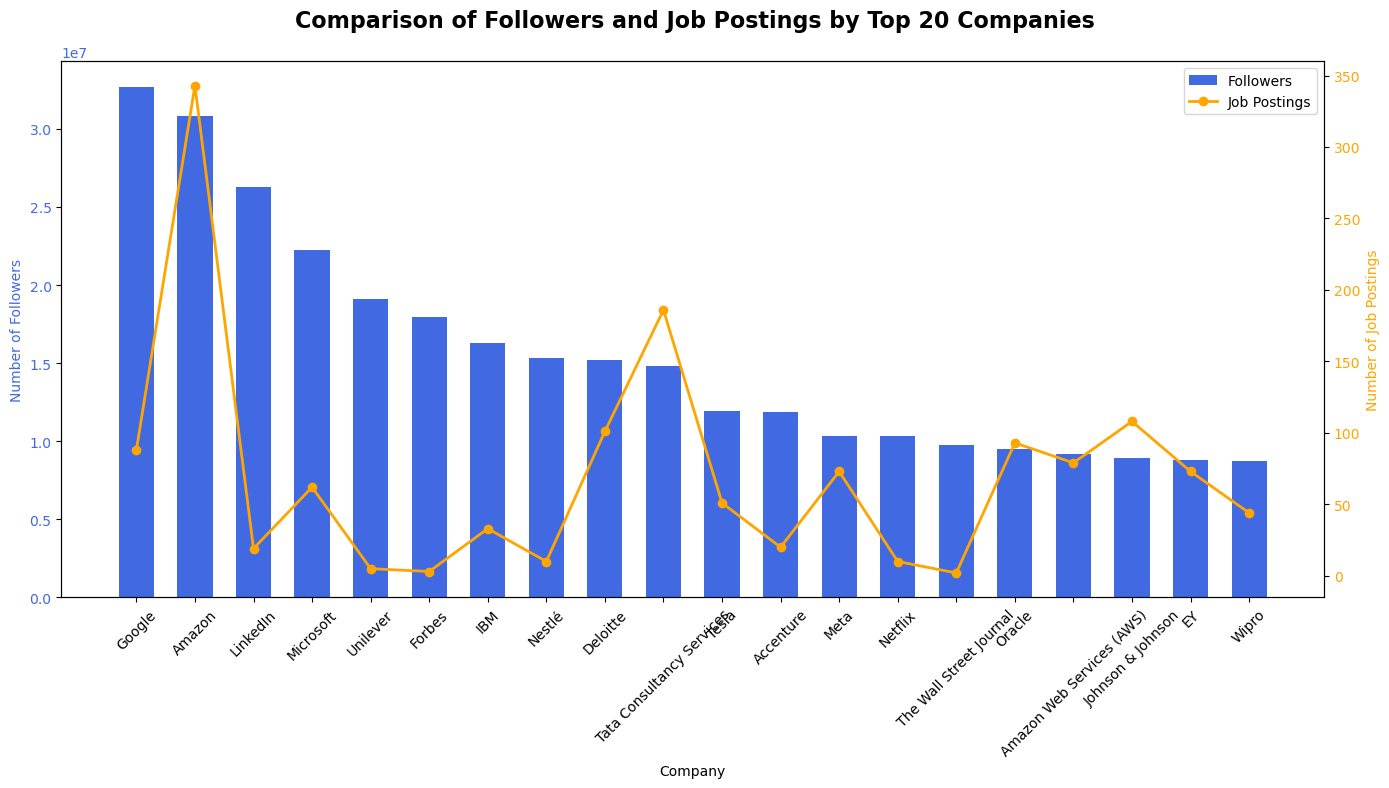

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/companies.csv')
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/employee_counts.csv')
postings = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/postings.csv')

# Merge companies with employee_counts to get follower count
companies_followers = pd.merge(
    companies[['company_id', 'name']], 
    employee_counts[['company_id', 'follower_count']], 
    on='company_id'
)

# Count job postings per company
job_postings_count = postings.groupby('company_id').size().reset_index(name='job_postings')

# Merge the followers data with job postings count using a left join
comparison_df = pd.merge(companies_followers, job_postings_count, on='company_id', how='left')

# Fill missing job postings with 0
comparison_df['job_postings'] = comparison_df['job_postings'].fillna(0)

# Group by company name and aggregate to remove duplicates
comparison_df = comparison_df.groupby('name', as_index=False).agg({
    'follower_count': 'max',
    'job_postings': 'max'
})

# Sort by follower count and select the top 20 companies
top_20_comparison = comparison_df.sort_values(by='follower_count', ascending=False).head(20)

# Plot the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot followers on the primary y-axis
ax1.bar(top_20_comparison['name'], top_20_comparison['follower_count'], 
        color='royalblue', label='Followers', width=0.6)
ax1.set_xlabel('Company')
ax1.set_ylabel('Number of Followers', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for job postings
ax2 = ax1.twinx()
ax2.plot(top_20_comparison['name'], top_20_comparison['job_postings'], 
         color='orange', marker='o', linestyle='-', linewidth=2, label='Job Postings')
ax2.set_ylabel('Number of Job Postings', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title and legends
fig.suptitle('Comparison of Followers and Job Postings by Top 20 Companies', fontsize=16, fontweight='bold')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Show the plot
plt.show()


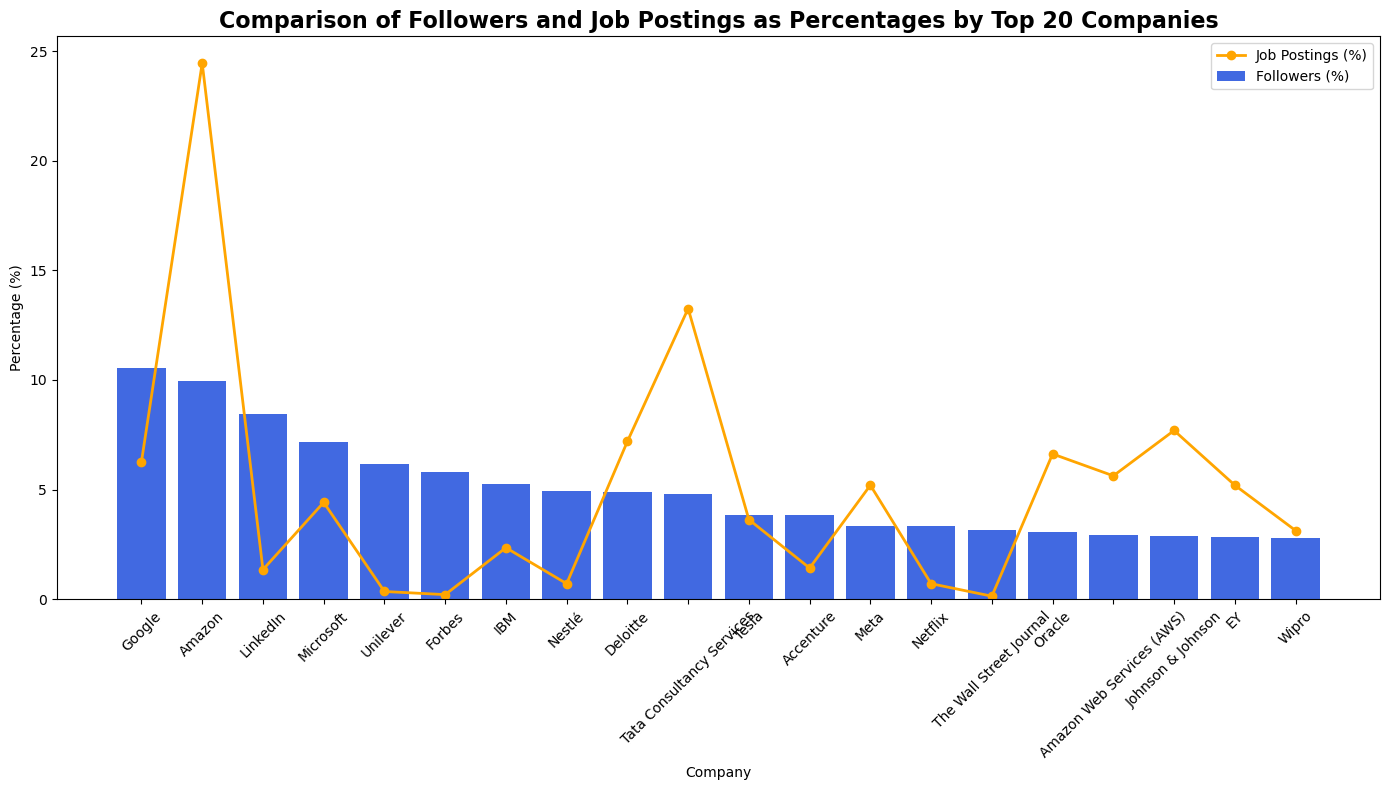

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
companies = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/companies.csv')
employee_counts = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/employee_counts.csv')
postings = pd.read_csv('/Users/liuzhiying/Desktop/MGC461_Professional_Communication/coursework/Linkin/postings.csv')

# Merge companies with employee_counts to get follower count
companies_followers = pd.merge(
    companies[['company_id', 'name']], 
    employee_counts[['company_id', 'follower_count']], 
    on='company_id'
)

# Count job postings per company
job_postings_count = postings.groupby('company_id').size().reset_index(name='job_postings')

# Merge the followers data with job postings count using a left join
comparison_df = pd.merge(companies_followers, job_postings_count, on='company_id', how='left')

# Fill missing job postings with 0
comparison_df['job_postings'] = comparison_df['job_postings'].fillna(0)

# Group by company name and aggregate to remove duplicates
comparison_df = comparison_df.groupby('name', as_index=False).agg({
    'follower_count': 'max',
    'job_postings': 'max'
})

# Sort by follower count and select the top 20 companies
top_20_comparison = comparison_df.sort_values(by='follower_count', ascending=False).head(20)

# Calculate percentages for followers and job postings
top_20_comparison['follower_percentage'] = (top_20_comparison['follower_count'] / top_20_comparison['follower_count'].sum()) * 100
top_20_comparison['job_posting_percentage'] = (top_20_comparison['job_postings'] / top_20_comparison['job_postings'].sum()) * 100

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))

# Bar chart for follower percentages
ax.bar(top_20_comparison['name'], top_20_comparison['follower_percentage'], color='royalblue', label='Followers (%)')

# Line plot for job posting percentages
ax.plot(top_20_comparison['name'], top_20_comparison['job_posting_percentage'], color='orange', marker='o', label='Job Postings (%)', linewidth=2)

# Adding labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Followers and Job Postings as Percentages by Top 20 Companies', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


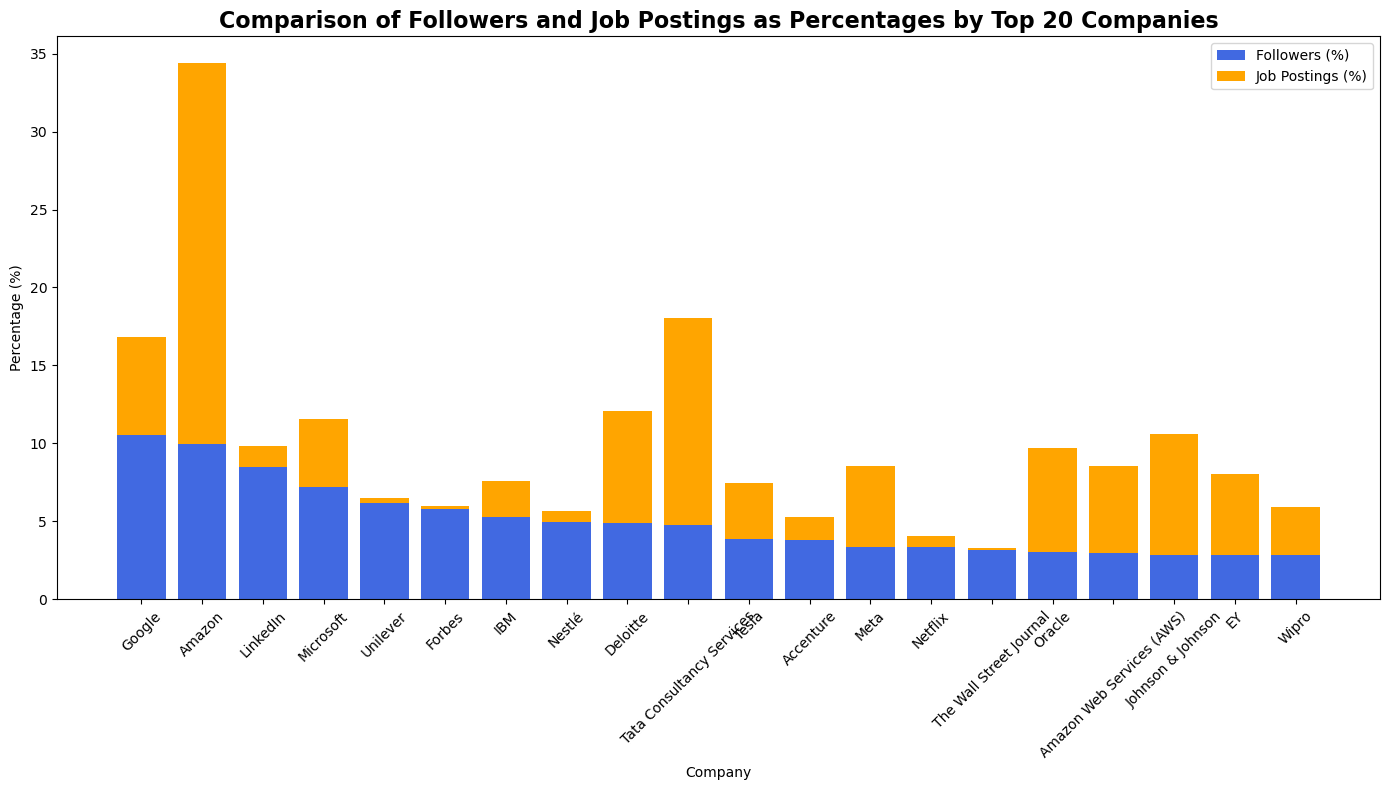

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot stacked bar chart for followers and job postings percentages
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(top_20_comparison['name'], top_20_comparison['follower_percentage'], color='royalblue', label='Followers (%)')
ax.bar(top_20_comparison['name'], top_20_comparison['job_posting_percentage'], color='orange', label='Job Postings (%)', bottom=top_20_comparison['follower_percentage'])

ax.set_title('Comparison of Followers and Job Postings as Percentages by Top 20 Companies', fontsize=16, fontweight='bold')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Company')
ax.tick_params(axis='x', rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


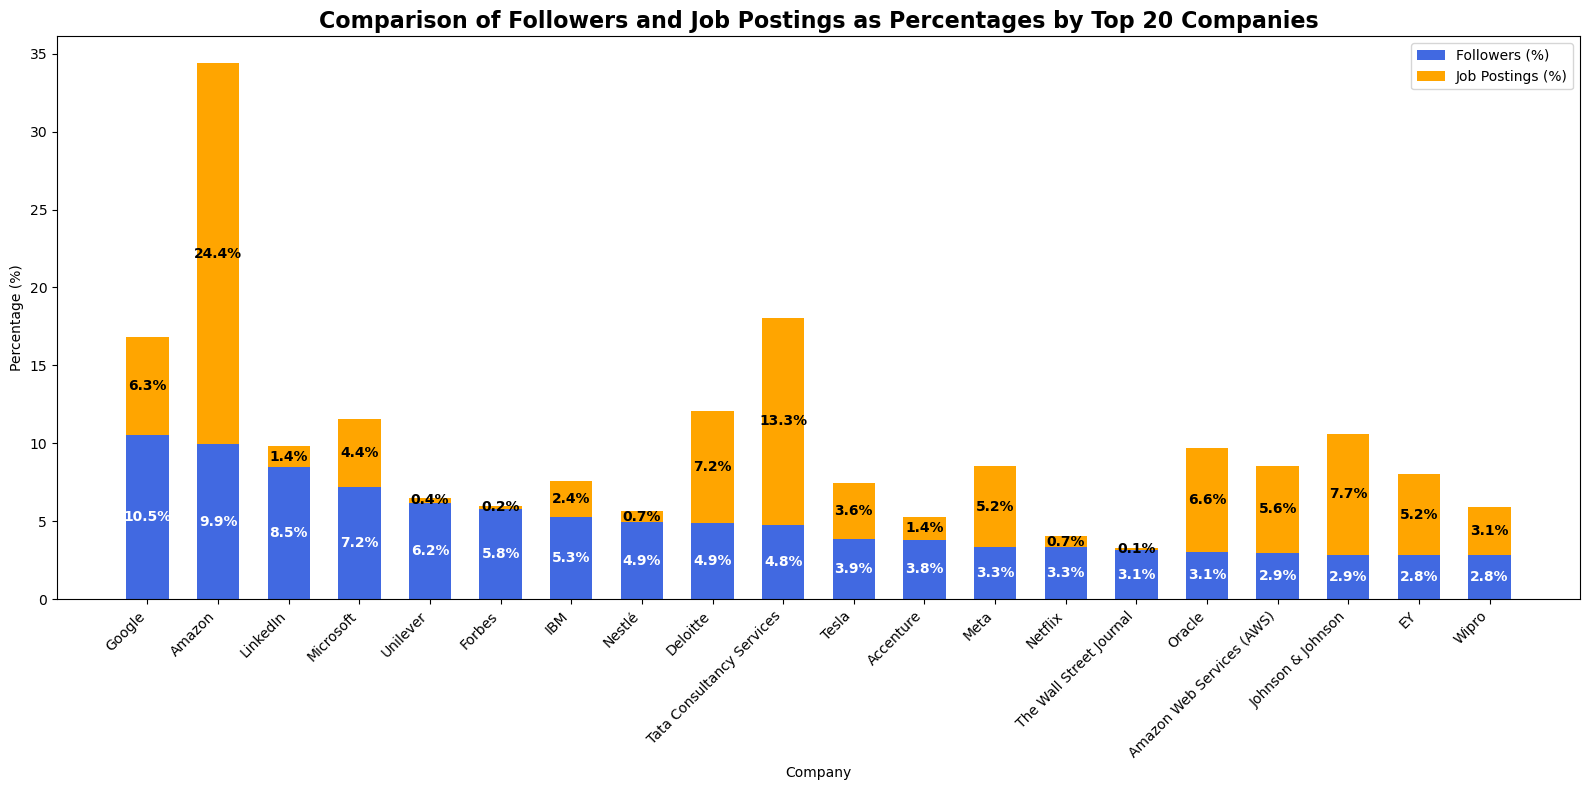

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Number of companies to display
top_n = 20

# Sort by followers and select the top N companies
top_comparison = top_20_comparison.sort_values(by='follower_count', ascending=False).head(top_n)

# Set positions for the bars
x = np.arange(len(top_comparison['name']))
width = 0.6  # Width of the bars

# Plot the data
fig, ax = plt.subplots(figsize=(16, 8))

# Plot followers percentage
bars1 = ax.bar(x, top_comparison['follower_percentage'], width, label='Followers (%)', color='royalblue')

# Plot job postings percentage
bars2 = ax.bar(x, top_comparison['job_posting_percentage'], width, label='Job Postings (%)', color='orange', bottom=top_comparison['follower_percentage'])

# Add labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Followers and Job Postings as Percentages by Top 20 Companies', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_comparison['name'], rotation=45, ha='right')
ax.legend()

# Add data labels for followers and job postings
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    # Label for followers
    ax.text(bar1.get_x() + bar1.get_width() / 2, height1 / 2, f'{height1:.1f}%', 
            ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    # Label for job postings
    ax.text(bar2.get_x() + bar2.get_width() / 2, height1 + height2 / 2, f'{height2:.1f}%', 
            ha='center', va='center', color='black', fontsize=10, fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


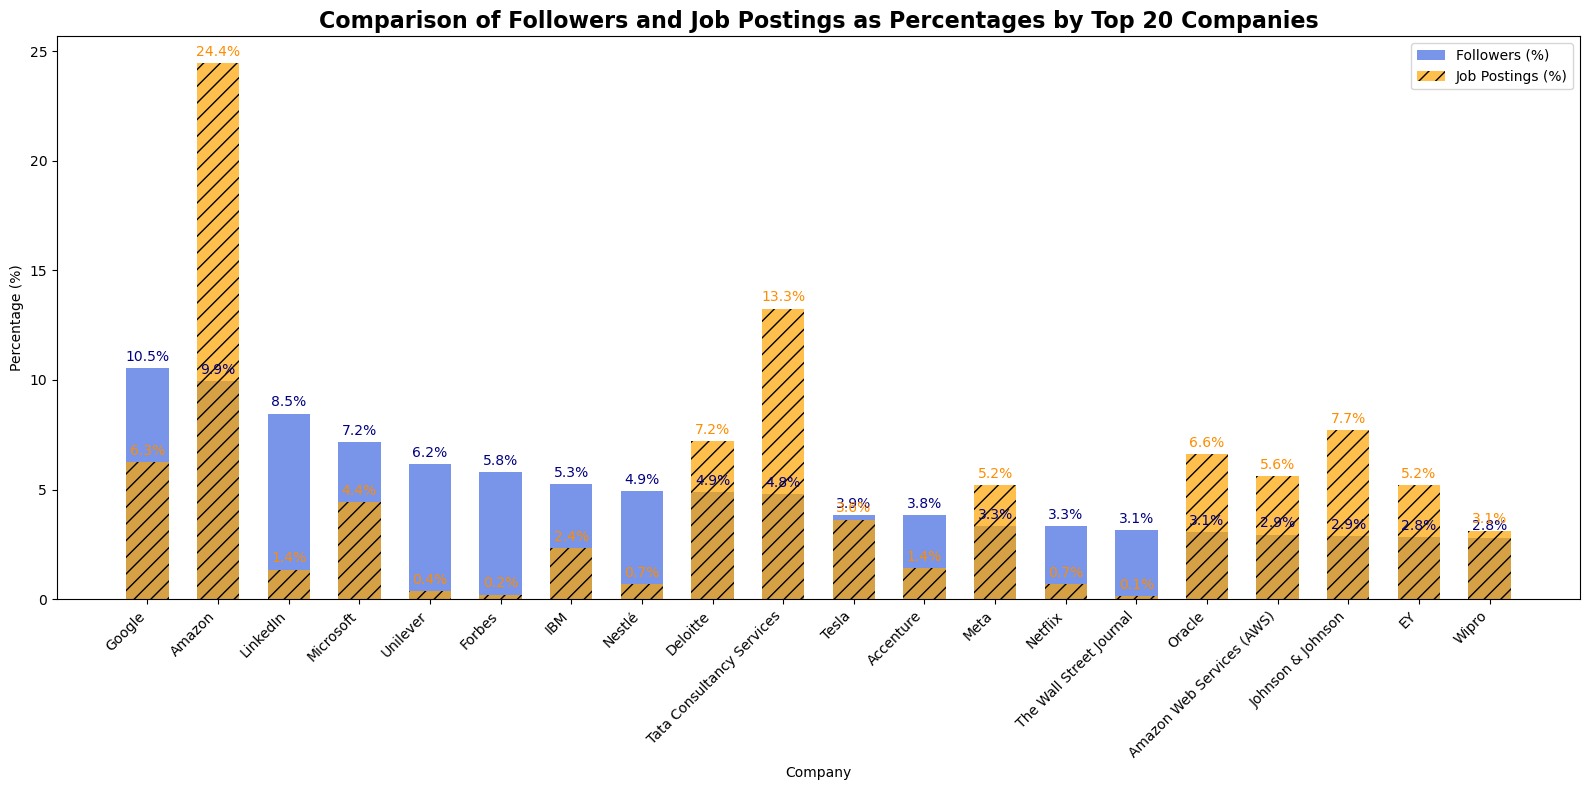

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Number of companies to display
top_n = 20

# Sort by followers and select the top N companies
top_comparison = top_20_comparison.sort_values(by='follower_count', ascending=False).head(top_n)

# Set positions for the bars
x = np.arange(len(top_comparison['name']))
width = 0.6  # Width of the bars

# Plot the data
fig, ax = plt.subplots(figsize=(16, 8))

# Plot followers percentage with transparency
bars1 = ax.bar(x, top_comparison['follower_percentage'], width, label='Followers (%)', color='royalblue', alpha=0.7)

# Plot job postings percentage with a hatch pattern to overlap the followers bar
bars2 = ax.bar(x, top_comparison['job_posting_percentage'], width, label='Job Postings (%)', color='orange', alpha=0.7, hatch='//')

# Add labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Followers and Job Postings as Percentages by Top 20 Companies', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_comparison['name'], rotation=45, ha='right')
ax.legend()

# Add data labels to the bars
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.1f}%', 
                xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='navy')
    ax.annotate(f'{height2:.1f}%', 
                xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='darkorange')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()


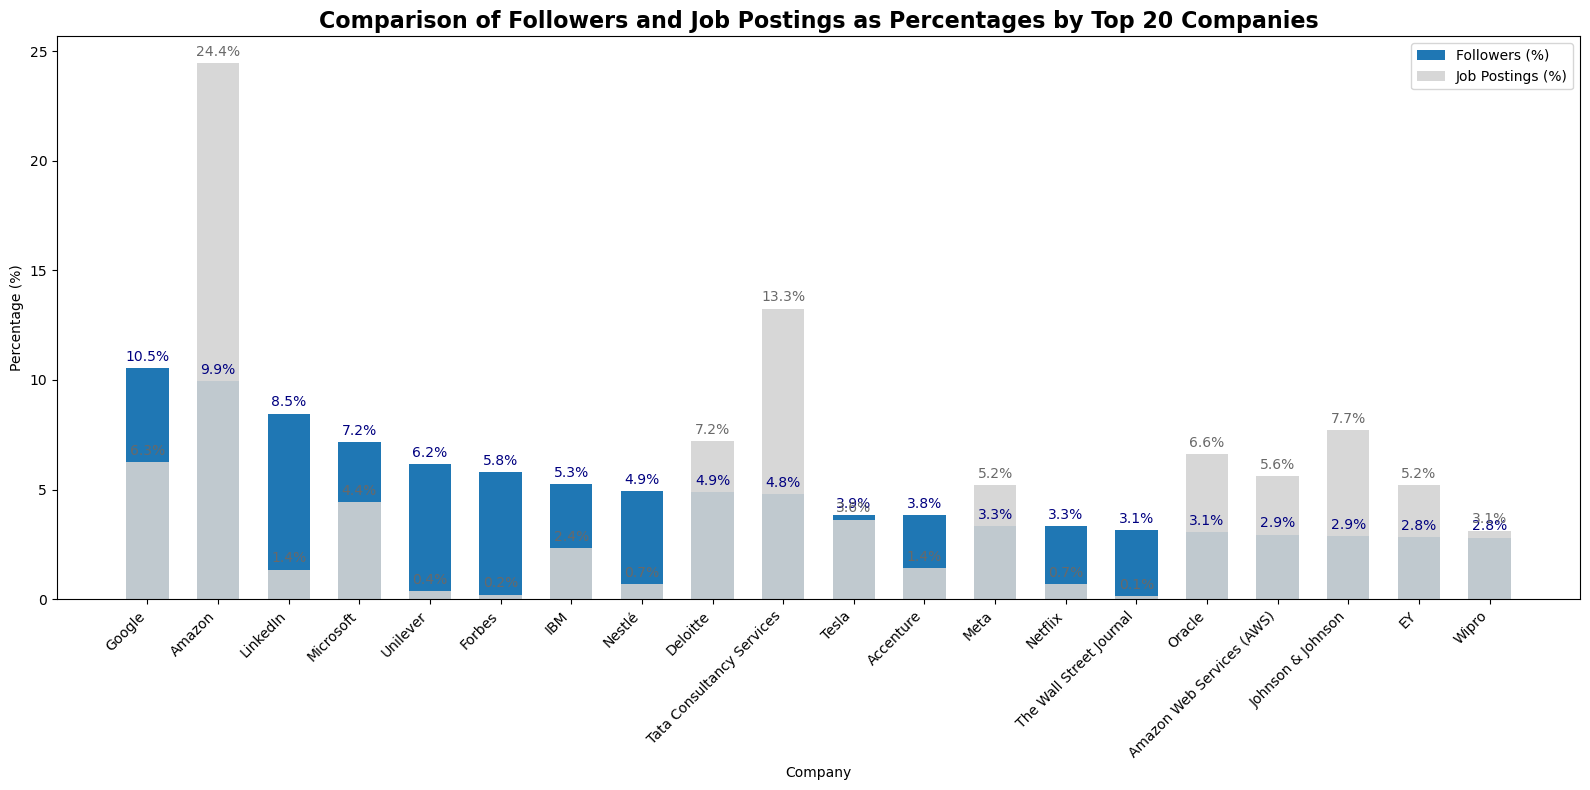

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Number of companies to display
top_n = 20

# Sort by followers and select the top N companies
top_comparison = top_20_comparison.sort_values(by='follower_count', ascending=False).head(top_n)

# Set positions for the bars
x = np.arange(len(top_comparison['name']))
width = 0.6  # Width of the bars

# Plot the data
fig, ax = plt.subplots(figsize=(16, 8))

# Plot followers percentage in dark blue
bars1 = ax.bar(x, top_comparison['follower_percentage'], width, label='Followers (%)', color='#1f77b4')

# Plot job postings percentage in light gray with transparency
bars2 = ax.bar(x, top_comparison['job_posting_percentage'], width, label='Job Postings (%)', color='#d3d3d3', alpha=0.9)

# Add labels and title
ax.set_xlabel('Company')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Followers and Job Postings as Percentages by Top 20 Companies', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_comparison['name'], rotation=45, ha='right')
ax.legend()

# Add data labels to the bars
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.1f}%', 
                xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='navy')
    ax.annotate(f'{height2:.1f}%', 
                xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='dimgray')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()
